# DATA SCIENCE PROJECT ON FIFA20 

## BUISNESS CASE: WITH THE FIFA20 DATASET WE NEED TO CLUSTER THE PLAYER BY THEIR SKILL INTO CERTAIN GROUP

## CLUSTERING TASK

### IMPORTING THE PYTHON LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### LOAD DATA

In [2]:
data = pd.read_csv('players_20.csv',na_filter=['+#'])
pd.set_option('display.max_columns',None)
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

## DOMAIN ANALYSIS

### INTRODUCTION OF PROJECT:
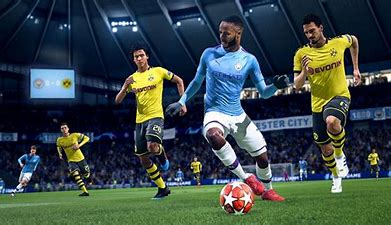
##### FIFA 20 is a football simulation video game published by Electronic Arts as part of the FIFA series. It is the 27th installment in the FIFA series, and was released on 27 September 2019 for Microsoft Windows, PlayStation 4, Xbox One, and Nintendo Switch.
#### SOFIFA-ID:
Id of fifa20 player
#### PLAYER URL:
A URL (Uniform Resource Locator) is a unique identifier used to locate a resource on the Internet. It is also referred to as a web address.
#### SHORT NAME:
Short or nick name name of player
#### LONG NAME:
Full name of player
#### AGE:
Age in years
#### DOB:
Date of birth of player
#### HEIGHT CM:
Player height in centimeter
#### WEIGHT KG:
Player body weight
#### NATIONALITY:
Nationality is the legal status, which represents the country from which an individual belongs. 
#### CLUB:
A group of people formed for the purpose of playing sports.
#### OVERALL:
The OVR (Overall) is made up of all the player's ingame stats.
#### POTENTIAL:
The potential rating, is the rating they will achieve for sure during the FIFA 20 career mode.
#### VALUE EUR:
The value of palyer in euro.
#### WAGE EUR:
A living wage is the amount of income needed to provide an player with a basic but socially acceptable standard of living.
#### PLAYER POSITIONS:
Positions indicate approximately where each player should be lined up prior to the start of a play.
#### PREFEERED FOOT:
Footedness may refer to the foot a player uses to kick with the greatest force and skill.
#### INTERNATIONAL REPUTATION:
International reputation is rated with 1-5 stars.
#### WEAK FOOT:
A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5 which specifies the shot power and ball control for the other foot of that player than his preferred foot's.
#### SKILL MOVES:
skill moves, it is assigned a number between 1 (least complex) and 5 (most complex). Players with higher skills are able to perform more complex moves.
#### WORK RATE:
work rates are how hard the player works on each end of the field.
#### BODY-TYPE:
A custom body type and character of football payer.
#### REAL FACE:
Face scan of real football palyer if it 'yes' then the character is look super realistic.
#### RELEASE CLAUSE EUR:
A release clause is the minimum amount of money you're willing to accept for that player.
#### PLAYER TAGS:
The tages of player is identified the palyer skills,like [Dribbler, Distance shooter, Crosser, Speedster]
#### TEAM POSITION:
The player’s positioning on the field
#### TEAM JERSEY NUMBER:
The number on the back of a football player's jersey is to identify a specific player.
#### LONED FROM:
It's a temporary restriction placed on player due to their club being short of players.
#### JOINED:
Joining date of club
#### CONTRACT VALID UNTIL:
The end year of contract of players.
#### NATION POSITION:
Nation position is similar to the team position of players.
#### NATION JERSEY NUMBER:
Jersey number of player.
#### PACE:
Fastest pace of player,striker or winger
#### SHOOTING:
shooting is hitting the ball in an attempt to score a goal. It is usually done using the feet or head.
#### PASSING:
The purpose of passing is to keep possession of the ball by maneuvering it on the ground between different players with the objective of advancing it up the playing field.
#### DRIBLING:
Dribbling Is Maneuvering A Ball By One Player While Moving In A Given Direction, Avoiding Problems’ Attempts To Intercept The Ball.
#### DEFENDING:
Defending is most relate to the defender to stop the attack
#### PHYSIC:
physic in player means intensity and their effort.
#### GK DIVING:
Goal keeper diving to save a shot.
#### GK HANDLING:
As a goalkeeper, you are allowed to handle the ball with your hands within your penalty area.
#### GK KICKING:
The goalkeeper is the player who usually kicks the ball to resume play, and they either kick it short to a teammate or it is kicked extremely hard to travel a long distance.
#### GK REFLEX:
Ability to react quickly.
#### GK SPEED:
Spped of goal keeper.
#### GK POSITIONING:
Position of goal keeper is around only goal posts.
#### PLAYER TRAITS:
A player’s traits are actions that he will be more likely to perform in matches.
#### ATTACKING CROSSING:
The aim of a cross is to create the easiest possible scenario for the attacking player to score a goal.
#### ATTACKING FINISHING:
Create a attack on field to score a goal
#### ATTACKING HEADING ACCURACY:
One of the fundamental principles of the attacking header is to head the ball downwards.
#### ATTACKING SHORT PASSING:
Short passes of ball to score a goal
#### ATTACKING VOLLEYS:
A volley is an air-borne strike in association football, where a player's foot meets and directs the ball in an angled direction before it has time to reach the ground.
#### SKILL DRIBBLING:
The score of dribbling skill with football
#### SKILL CURVE:
The curve of football at the time of goal
#### SKILL FK ACCURACY:
It stands for field goal. It is when a player kicks a ball through the uprights from a set distance.
#### SKILL LONG PASSING:
The long passing skill score of the player
#### SKILL BALL CONTROL:
The ball control of the player at playing time
#### MOVEMENT ACCERLATION:
how quickly player can increase your velocity towards maximum speed.
#### MOVEMENT SPRINT SPPED:
Sprinting speed score of the player.
#### MOVEMENT AGILITY:
Agility is the ability to move quickly and easily, including moving in different directions without losing balance
#### MOVEMENT REACTION:
The score of the quick reation of player.
#### MOVEMENT BALANCE:
Balance is the ability to control your body in its own space.
#### SHOT POWER:
power generate to score a goal.
#### POWER JUMPING:
The jumping ability of the player on field.
#### POWER STAMINA:
Stamina of player on filed.
#### POWER STRENGTH:
Strength of player on field.
#### POWER LONG SHOT:
Total no of power long shot of football.
#### MENTAILITY AGGRESSION:
aggression is a characteristic that can have many negative as well as positive effects on performance of player.
#### MENTALITY INTERCEPTION:
interception is thrown the possession of the ball is given to the other team.
#### MENTALITY POSITIONING:
The mentality positioning of player determines how defensive or attacking your players set out to play.
#### MENTALITY VISION:
The vision/mindset of player on filed.
#### MENTALITIES PENALTIES:
when a player commits an infraction against the rules of the game a foul will be called and a penalty will be assessed.
#### MENTALITY COMPOSURE:
composure stand for: Recognize–Regroup–Refocus. The first step is to Recognize that you are dwelling on the mistake, which limits your ability focus on the next play.
#### DEFENDING MAKING:
when your team is defending, you want to make the field small and the options of the other team limited.
#### DEFENDING STANDING TACKLE:
Defending standing Tackle of the player to get a ball on filed.
#### DEFENDING SLIDING TACKLE:
Defending sliding tackle of player to get a ball.
#### GOALKEEPING DIVING:
Goal keeper diving to save a goal.
#### GOALKEEPING HANDLING:
handle the ball with your hands within your penalty area.
#### GOALKEEPING KICKING:
A kick taken by the goalkeeper when the attacking team has kicked the ball over the goal line.
#### GOALKEEPING POSITIONING:
A Positioning of player to save the goal.
#### GOALKEEPING REFLEX:
The reflex of goalkeeper and players.
### THE REMAINING FEATURE IS THE ABBREVATION OF FOOTBALL POSITION SCORE:
#### LS:
Long snapper or left striker.
#### ST:
Striker
#### RS:
Right striker
#### LW:
Left sided wingers.
#### LF:
Left forword
#### CF:
Center forword
#### RF:
Right forword
#### RW:
The RW is usually on the right end of the attacking trident, with the Striker and Left Winger, which mainly contributes to the team in terms of goals and assists.
#### LAM:
Left attacking midfield
#### CAM:
Center attacking midfield
#### RAM:
Right attacking midfield
#### LM:
Left midfield
#### LCM:
Left center midfield
#### CM:
Center Midfield
#### RCM:
Right center midfield
#### RM:
Right midfield
#### LWB:
Left Wing Back
#### LDM:
Left defensive midfield
#### CDM:
Center defensive midfield
#### RDM:
Right defensive midfield
#### RWB:
Right wing back
#### LB:
Left back
#### LCB:
Left center back
#### CB:
Center back
#### RCB:
Right center back
#### RB:
Right back
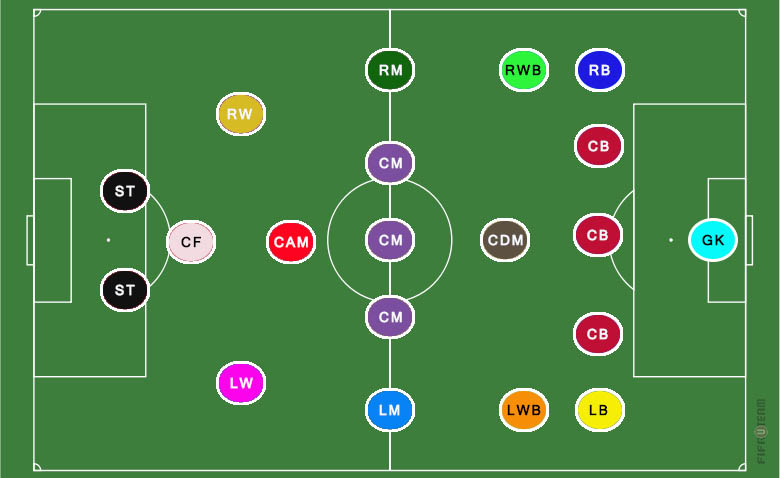



## BASIC CHECKS

In [3]:
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [4]:
data.tail()

sofifa_id                                         player_url  \
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg  \
18273    Shao Shuai            邵帅   22  1997-03-10        186         79   
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  overall  potential  \
18273    China PR               Beijing Renhe FC       48         56   
18274    China PR               Shanghai SIPG FC       48         56   
18275    China PR         Hebei China Fortune FC       48         56   
18276    China PR  Shanghai Greenland Shenhua FC       48         54   
18277    China PR         Hebei China Fortune FC       48         51   

       value_eur  wage_eur player_positions preferred_foot  \
18273      40000      2000               CB          Right   
18274      40000      2000               CB          Right   
18275      40000      1000               CM          Right   
18276      40000      1000               CM          Right   
18277      40000      2000               CM          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
18273                         1          3            2    Medium/High   
18274                         1          2            2  Medium/Medium   
18275                         1          2            2     Low/Medium   
18276                         1          2            2        Low/Low   
18277                         1          3            2  Medium/Medium   

      body_type real_face  release_clause_eur player_tags team_position  \
18273    Normal        No             70000.0         NaN           RES   
18274    Normal        No             72000.0         NaN           SUB   
18275      Lean        No             70000.0         NaN           SUB   
18276      Lean        No             70000.0         NaN           SUB   
18277    Normal        No                 NaN         NaN           SUB   

       team_jersey_number      loaned_from      joined  contract_valid_until  \
18273                36.0              NaN  2018-07-13                2019.0   
18274                31.0              NaN  2019-02-01                2022.0   
18275                38.0              NaN  2019-01-01                2019.0   
18276                33.0              NaN  2019-02-01                2022.0   
18277                37.0  Tianjin TEDA FC         NaN                2019.0   

      nation_position  nation_jersey_number  pace  shooting  passing  \
18273             NaN                   NaN  57.0      23.0     28.0   
18274             NaN                   NaN  58.0      24.0     33.0   
18275             NaN                   NaN  54.0      35.0     44.0   
18276             NaN                   NaN  59.0      35.0     47.0   
18277             NaN                   NaN  60.0      32.0     51.0   

       dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
18273       33.0       47.0    51.0        NaN          NaN         NaN   
18274       35.0       48.0    48.0        NaN          NaN         NaN   
18275       45.0       48.0    51.0        NaN          NaN         NaN   
18276       47.0       45.0    52.0        NaN          NaN         NaN   
18277       45.0       47.0    55.0        NaN          NaN         NaN   

       gk_reflexes  gk_speed  gk_positioning player_trai

In [5]:
columns = list(data.columns)
print(columns)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

* In this data 104 column available with unique column

In [6]:
data.shape

(18278, 104)

* In all data 18278 Observation and 104 feature.

### EXAMINE THE DATA

In [7]:
data.info() # If view all feature use verbose=True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


* In this data all type of data is available [float=16. int=45, object=43]

### STASTICAL MEASURE OF DATA

In [8]:
data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

* In this data No constant column is available

In [9]:
data.describe(include='O')

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions  \
count        18278       18278       18278         18278            18278   
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type real_face player_tags  \
count           18278          18278     18278     18278        1499   
unique              2              9        10         2          83   
top             Right  Medium/Medium    Normal        No   #Strength   
freq            13960           9875     10750     16310         514   

       team_position loaned_from      joined nation_position  player_traits  \
count          18038        1048       16990            1126           7566   
unique            29         316        1760              26            921   
top              SUB    Sassuolo  2019-07-01             SUB  Early Crosser   
freq            7820          17        1465             587            501   

           ls     st     rs     lw     lf     cf     rf     rw    lam    cam  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique     94     94     94    107    103    103    103    107    103    103   
top      61+2   61+2   61+2   63+2   63+2   63+2   63+2   63+2   61+2   61+2   
freq      725    725    725    736    727    727    727    736    748    748   

          ram     lm    lcm     cm    rcm     rm    lwb    ldm    cdm    rdm  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique    103    100     88     88     88    100     98     98     98     98   
top      61+2   61+2   58+2   58+2   58+2   61+2   59+2   59+2   59+2   59+2   
freq      748    809    775    775    775    809    682    636    636    636   

          rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  
unique     98     96    110    110    110     96  
top      59+2   61+2   63+2   63+2   63+2   61+2  
freq      682    667    621    621    621    667

* In Categorical data also no constant column

## EXPLOTARY DATA ANALYSIS

#### REMOVE THE SPECIAL CHARACTER AND SPLIT THE STRING

* Because it creating issue to do analysis

In [3]:
# First remove the special character from data
data = data.replace('[\#]','',regex=True)
data.head(1)

sofifa_id                                         player_url short_name  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name  age         dob  height_cm  weight_kg  \
0  Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona       94         94   95500000    565000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   

   skill_moves   work_rate body_type real_face  release_clause_eur  \
0            4  Medium/Low     Messi       Yes         195800000.0   

                                         player_tags team_position  \
0  Dribbler, Distance Shooter, Crosser, FK Specia...            RW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   

   gk_speed  gk_positioning  \
0       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   

   goalkeeping_reflexes    ls    st    rs    lw    lf    cf    rf    rw   lam  \
0                     8  89+2  89+2  89+2  93+2  93+2  93+2  93+2  93+2  93+2   

    cam   ram    lm   lcm    cm   rcm    rm   lwb   ldm   cdm   rdm   rwb  \
0  93+2  93+2  92+2  87+2  87+2  87+2  92+2  68+2  66+2  66+2  66+2  68+2   

     lb   lcb    cb   rcb    rb  
0  63+2  52+2  52+2  52+2  63+2

In [4]:
# Split the column and remove the '+' with the values after them
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
           'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
data[columns]

for colmun in columns: # for itertion of columns
    data[colmun] = data[colmun].str.split('+',expand=True)[0] # Split of string
data.head(1)

sofifa_id                                         player_url short_name  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name  age         dob  height_cm  weight_kg  \
0  Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona       94         94   95500000    565000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   

   skill_moves   work_rate body_type real_face  release_clause_eur  \
0            4  Medium/Low     Messi       Yes         195800000.0   

                                         player_tags team_position  \
0  Dribbler, Distance Shooter, Crosser, FK Specia...            RW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   

   gk_speed  gk_positioning  \
0       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   

   goalkeeping_reflexes  ls  st  rs  lw  lf  cf  rf  rw lam cam ram  lm lcm  \
0                     8  89  89  89  93  93  93  93  93  93  93  93  92  87   

   cm rcm  rm lwb ldm cdm rdm rwb  lb lcb  cb rcb  rb  
0  87  87  92  68  66  66  66  68  63  52  52  52  63

#### 1.UNIVARIATE ANALYSIS

In [ ]:
univariate = data[[ 'age',  'height_cm', 'weight_kg','overall', 'potential', 'value_eur', 'wage_eur', 
                   'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type',
                   'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 
                   'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing',
                   'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 
                   'gk_positioning','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                   'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 
                   'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 
                   'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 
                   'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
                   'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking',
                   'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 
                   'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 
                   'cf', 'rf', 'rw', 'lam','cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
                   'lb', 'lcb', 'cb', 'rcb', 'rb']]
import sweetviz
sv = sweetviz.analyze(univariate)
sv.show_html() #Generate default argument

#### OBSERVATIONS:
##### 1.AGE:
* The range of player age between 16 to 42 with the average of 25.3

##### 2.HEIGHT CM:
* The average height of pplayer is 181.4cm, maximum height is 205 and minimum height is 156cm.

##### 3.WEIGHT KG:
* The range of weight of player between 50 to 110kg.

##### 4.OVERALL:
* The maximum score of stats is 94 and minimum is 48.0 with the average of 66.2

##### 5.POTENTIAL:
* The maximum score of player potential is 95.0 and minimum score of potential is 49.0

##### 6.VALUE EUR:
* The average value of player is 2.5million.
* Maximum value of player is 105.5 million.

##### 7.WAGE EUR:
* The maximum living wage of player is 565k with the average of 9k.

##### 8.PREFEERED FOOT:
* 75% of player prefeered right foot.
* 25% of player prefeered left foot.

##### 9.INTERNATIONAL REPUTATION:
* The range of international reputation is 1 to 5.
* 92% of player rated with 1, 6% of player is rated with 2 and remaining player rated with 3,4,5 rating.

##### 10.WEEK FOOT:
* A week foot is rated between 1 to 5.
* Most of week foot player rating is 3

##### 11.SKILL MOVES:
* The skill moves range between 1 to 5.
* 2 skill moves is maximum in player as well as 36% is 3 and 11% is 1 skill moves.

##### 12.WORK RATE:
* The maximum 54% count of work rate is medium then 18% is high/medium.

##### 13.BODY TYPE:
* 59% player body type is normal
* 36% player body type is lean.

##### 14.REAL FACE:
* 89% player face is not real and remaining 11% face is real in game.

##### 15. RELEASE CLAUSE EUR:
* The maximum release clasue of player is 165.8million with the average of 4.7 million

##### 16. PLAYER TAGS:
* Strength, acrobat, engine, and speedster this tags is most in player tags

##### 17.TEAM POSITION & NATION POSITION:
* The maximum 7280 is SUB, 2958 is RES team posistion
* remaining all position is less than 5%

##### 18.TEAM JERSEY NUMBER:
* The range of team jersey number is 1 to 99.
* Maximum team jersey number between 1 to 40.

##### 19.CONTRACT VALID UNTIL:
* Most of the player contract valid until 2020, 23% player contract valid until 2021
* The range of contract year between 2019 to 2026.

##### 20.NATION JERSEY NUMBER:
* The range of nation jersey number between 1 to 30.
* Most of the jersey no between 1 to 20.

##### 21.PACE:
* The most of the pace of player between 60 to 80.

##### 22.SHOOTING:
* The range of shooting score between 15 to 93, Most number of shooting score around 25 to 70

##### 23.PASSING:
* The range of passing score of the player is 24 to 92 with the average 57.2.

##### 24. DRIBBLING:
* The most no of dribbling score between 50 to 80.

##### 25.DEFENDING:
* The range of defending between 15 to 90.the Most no of defending score between 50 to 70.

##### 26.PHYSIC:
* The physic score range between 27.0 to 90.0 the most no of physcore between 60 to 80

##### 27.GK DIVING:
* Most no of score of gk diving between 60 to 70
* The range of gk diving between 44 to 90.

##### 28. GK HANDLING:
* The most observation of gk handling between 60 to 70, maximum score is 92 and minimum score is 42

##### 29.GK KICKING:
* The range of gk kicking in between 35.0 to 93.0 with the average of 61.8.

##### 30.GK REFLEX:
* Most of the gk reflex between 60 to 70.

##### 31.GK SPPED:
* The highest speed of of gk is 65.0, most no of gk speed between 25 to 50

##### 32. GK POSITIONING:
* Most gk positioning score is 65 and maximum score is 91 as well as minimum score is 41

##### 33. ATTACKING CROSSING:
* The attacking crossing range between 5 to 93, the most observation of attacking passing between 50 to 70

##### 34.ATTACKING FINISHING:
* Most of the attacking finishing is 60,Maximum 95 and minimum 2 attacking finishing.

##### 35.ATTACKING HEADING ACCURACY:
* Heading accuracy range between 5 to 93,most observation of attacking heading accuracy between 50 to 60

##### 36.ATTACKING SHORT PASSING:
* most observation of attacking short passing between 60 to 70

##### 37.ATTACKING VOLLEYS:
* most observation of attacking volleys between 30 to 70 with the average of 42.8.

##### 38.SKILL DRIBBLING:
* most observation of skill dribbling is 65.
* The range of skill dribbling between 4 to 97

##### 39.SKILL CURVE:
* The most observation of skill curve between 40 to 70, maximum score is 94 and minimum score is 6

##### 40.SKILL FK ACCURACY:
* The maximum accuracy is 94 and minimum accuracy is 4 with the average of 42.7

##### 41.SKILL  LONG PASSING:
* The most observation of skill long passing between 50 to 60, maximum score is 92 and minimum score is 8

##### 42.SKILL BALL CONTROL:
* The maximum skill ball control is 96 and minimum skill ball control is 5 with the average of 58.5

##### 43.MOVEMENT ACCELERATION:
* The most observation of movement acceleration between 60 to 80, maximum score is 97 and minimum score is 12

##### 44.MOVEMENT  SPRINT SPPED:
* Maximum sprint speed is 96 and minimum sprint speed is 11 with the average of 64.4

##### 45.MOVEMENT AGILITY:
* Maximum movement agility is 96 and minimum movement agility is 11 with the average of 63.5

##### 46.MOVEMENT REACTION:
* Maximum movement reaction is 96 and minimum movement reaction is 21 with the average of 61.8

##### 47.MOVEMENT BALANCE:
* The range of movement balance is 12 to 97 with 64.9 average.

##### 48.POWER SHOT POWER:
* Maximum shot power is 95 and minimum shot power is 14 with the average of 58.2

##### 49.POWER JUMPING:
* Maximum power jumping is 95 and minimum power jumping is 19 with the average of 64.9

##### 50.POWER STAMINA:
* Maximum power stamina is 97 and minimum shot stamina is 12 with the average of 62.9

##### 51.POWER STRENGTH:
* Maximum power strength is 97 and minimum power strength is 20 with the average of 65.2

##### 51.POWER LONG SHOT:
* Maximum power long shot is 94 and minimum power long shot is 4 with the average of 46.8

##### 52.MENTALITY AGGRESSION:
* Maximum mentality aggression is 95 and minimum mentality aggression is 9 with the average of 55.7

##### 53.MENTALITY INTERCEPTIONS:
* Maximum mentality interception is 93 and minimum mentality interception is 3 with the average of 46.3

##### 54.MENTALITY POSITIONING:
* Maximum mentality positioning is 95 and minimum mentality positioning is 2 with the average of 50.1

##### 55.MENTALITY VISION:
* Maximum mentality vision is 94 and minimum mentality vision is 9 with the average of 53.6

##### 56.MENTALITY PENALTIES:
* Maximum mentality penalties is 92 and minimum mentality penalties is 7 with the average of 48.7

##### 58.MENTALITY COMPOSER:
* Maximum mentality composure is 96 and minimum mentality composure is 12 with the average of 58.5

##### 59.DEFENDING MARKING:
* Maximum defending marking is 94 and minimum defending marking is 1 with the average of 46.8

##### 60.DEFENDING STANDING TACKLE:
* Maximum defending standing tackle is 92 and minimum defending standing tackle is 5 with the average of 47.6

##### 61.DEFENDING SLIDING TACKLE:
* Maximum defending sliding tackle  is 90 and minimum defending sliding tackle  is 3 with the average of 45.6

##### 62.GOALKEEPING DIVING:
* Maximum goalkeeping diving is 90 and minimum goalkeeping diving is 1 with the average of 16.6

##### 63.GOALKEEPING HANDLING:
* Maximum goalkeeping diving is 92 and minimum goalkeeping diving is 1 with the average of 16.4

##### 63.GOALKEEPING KICKING:
* Maximum goalkeeping diving is 93 and minimum goalkeeping diving is 1 with the average of 16.2

##### 63.GOALKEEPING POSITIONING:
* Maximum goalkeeping diving is 91 and minimum goalkeeping diving is 1 with the average of 16.4

##### 63.GOALKEEPING REFLEX:
* Maximum goalkeeping diving is 92 and minimum goalkeeping diving is 1 with the average of 16.7

#### 64.PLAYER POSITIONS
##### [LS, ST, RS, LW, LF, CF, LF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB]
* This all position scores are almost same as well as most of the observation range between 56 to 63

#### BIVARIATE AND MULTIVARIATE ANALYSIS

#### NUMERICAL VERIABLE

##### 1.IMPACT OF AGE TO MOVEMENT REACTION

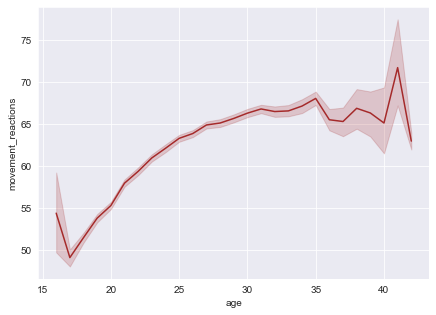

In [12]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.lineplot(x='age',y='movement_reactions',data=data,color='brown')
plt.show()

##### OBSERVATION:
* At the age 15 to 20 movement raction is less.
* If player age is increasing player movement reaction also increasing.

##### 2.IMPACT OF HEIGHT TO WEIGHT

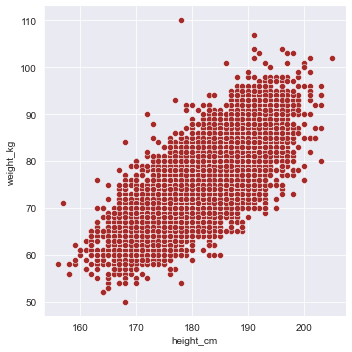

In [13]:
sns.relplot(x='height_cm',y='weight_kg',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the players height is increases player weight also increases.

##### 3.RELATION BETWEEN OVERALL AND POTENTIAL WITH RESPECT TO PREFERRED FOOT

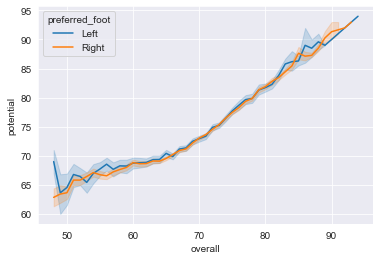

In [14]:
sns.lineplot(x='overall',y='potential',data=data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If the players overall score is increasing the score of potential also increasing with both foot.

##### 4.RELATION BETWEEN VALUE EUR AND WAGE EURO WITH RESPECT TO PREFERRED FOOT

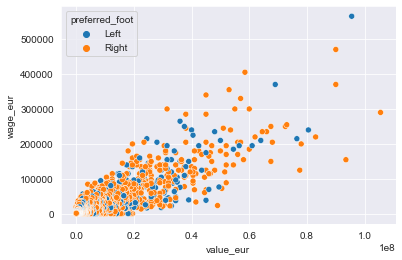

In [15]:
sns.scatterplot(x='value_eur',y='wage_eur',data=data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If player value is less then the wage of player also less.
* If the value of player is more the wage is silghtly more.

##### 5.IMPACT OF CONTRACT VALID UNTIL TO RELEASE CLAUSE EUR

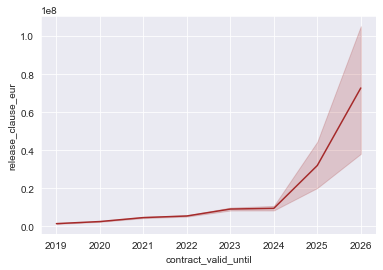

In [16]:
sns.lineplot(x='contract_valid_until',y='release_clause_eur',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If player contract valid until 2024 to 2026 then the relase clause of player is more.
* If player contract valid until 2019 to 2024 then the release clause of player is less.

##### 6..RELATION BETWEEN PACE AND SHOOTING WITH RESPECT TO PREFERRED FOOT

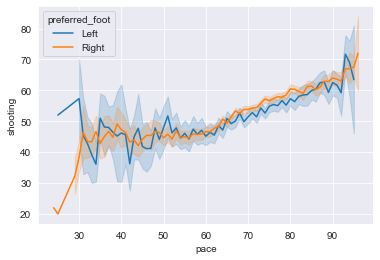

In [17]:
sns.lineplot(x='pace',y='shooting',data=data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If the player preferred left foot then the pace is less but shooting is around 50 to 60.
* If the player preferred right foot then the pace is less as well as shooting also less. 

##### 7.IMPCAT OF DRIBBLING TO DEFENDING

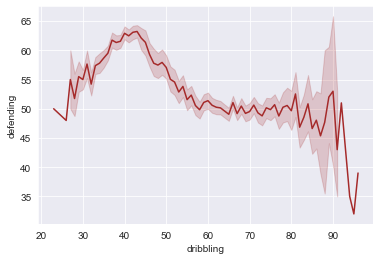

In [18]:
sns.lineplot(x='dribbling',y='defending',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the dribbling score is 30 to 50 then the defending score is high.
* If dribbling score is more then the defending score also less.

##### 8.IMPACT OF PHYSIC TO ATTACKING CROSSING

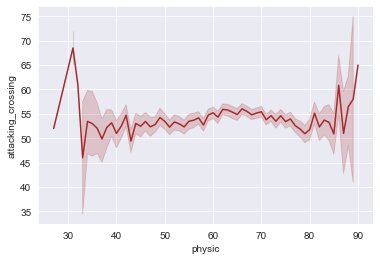

In [19]:
sns.lineplot(x='physic',y='attacking_crossing',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the physic is less then the attacking crossing is more.
* Otherwise physic range between 35 to 80 the attacking crossing is constant.

##### 9.IMPACT OF GK DIVING TO GK HANDLING

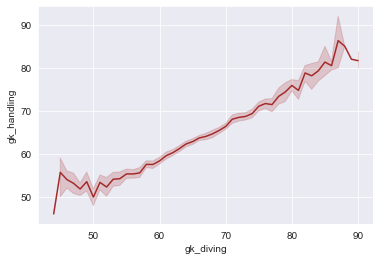

In [20]:
sns.lineplot(x='gk_diving',y='gk_handling',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the gk diving score is increases the gk handling score also increases.

##### 10.IMPACT OF GK RELEXES TO GK SPPED

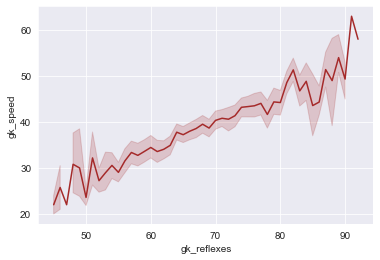

In [21]:
sns.lineplot(x='gk_reflexes',y='gk_speed',data=data,color='brown')
plt.show()

##### OBSERVATION:
* Less gk reflexes then the gk speed also less.
* More gk reflexes then the gk speed also more.

##### 11.IMPACT OF GK POSITIONING TO GK KICKING

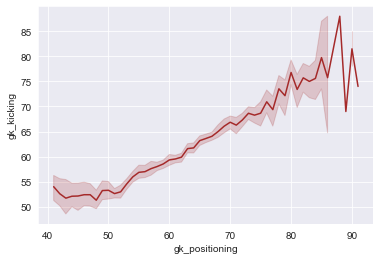

In [22]:
sns.lineplot(x='gk_positioning',y='gk_kicking',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the gk positioning score is less then the gk kicking score also less.
* If the gk positioning score is increases then the gk kicking score also increases.

##### 12.IMPACT OF ATTACKING CROSSING TO ATTACKING FINISHING

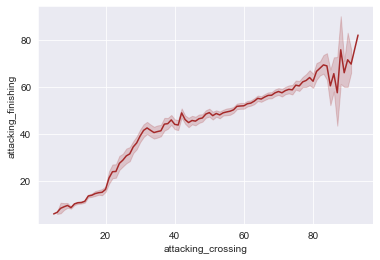

In [23]:
sns.lineplot(x='attacking_crossing',y='attacking_finishing',data=data,color='brown')
plt.show()

##### OBSERVATION:
* Attcking score between 20 to 40 then attacking finishing score around 40 to 50.
* Either attacking crossing is more then attacking finishing also more.

##### 13.IMPACT OF ATTACKING SHORT PASSING TO ATTACKING VOLLEYS

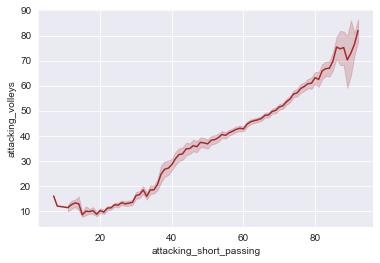

In [24]:
sns.lineplot(x='attacking_short_passing',y='attacking_volleys',data=data,color='brown')
plt.show()

##### OBSERVATION:
* More attacking short passing then the more attacking volleys.
* Less attacking short passing then the less attacking volleys.

##### 14.IMPACT OF SKILL DRIBBLING TO SKILL BALL CONTROL

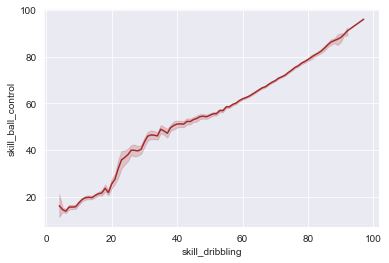

In [25]:
sns.lineplot(x='skill_dribbling',y='skill_ball_control',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the dribbling skill is more then ball control skill also more.

##### 15..RELATION BETWEEN SKILL CURVE AND SKILL FK ACCURACY WITH RESPECT TO PREFERRED FOOT

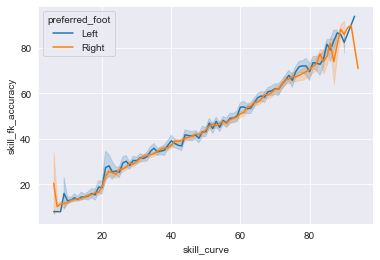

In [26]:
sns.lineplot(x='skill_curve',y='skill_fk_accuracy',data=data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If skill curve is increases then the skill fk accuracy is also increases with both foot.

##### 16.IMPACT OF SKILL LONG PASSING TO POWER LONG SHOTS

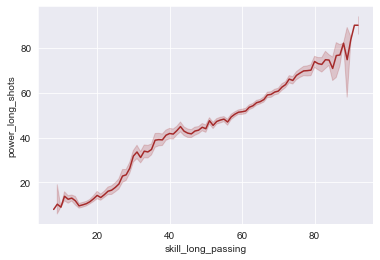

In [27]:
sns.lineplot(x='skill_long_passing',y='power_long_shots',data=data,color='brown')
plt.show()

##### OBSERVATION:
* More skills of long passing then the increase of power long shots.

##### 17.IMPACT OF MOVEMENT SPRINT SPEED TO MOVEMENT REACTION

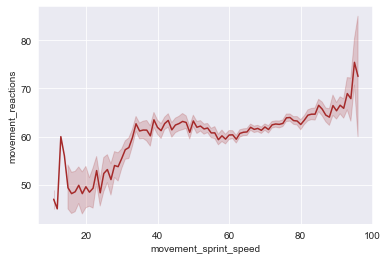

In [28]:
sns.lineplot(x='movement_sprint_speed',y='movement_reactions',data=data,color='brown')
plt.show()

##### OBSERVATION:
* Movement sprint range around 40 to 100 then the movement reaction is constant otherwise fall in both

##### 18.IMPACT OF POWER SHOT TO POWER STAMINA

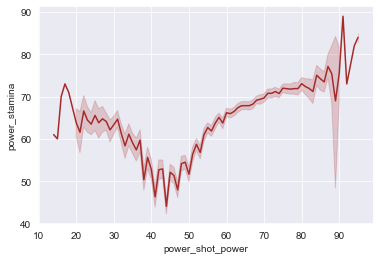

In [29]:
sns.lineplot(x='power_shot_power',y='power_stamina',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the power shot range around 30 to 60 then the power stamina is decreases
* If the player has more shot power then the stamina is more.

##### 19.IMPACT OF POWER JUMPING TO POWER STRENGTH

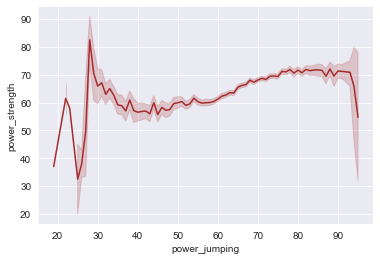

In [30]:
sns.lineplot(x='power_jumping',y='power_strength',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the power jumping is 30 then the power strength is more and below 30 power jumping less power strength.
* Power jumping above 30 then the power strength is constant

##### 20.IMPACT TO MENTALITY AGGRESSION TO MENTALITY POSITIONING

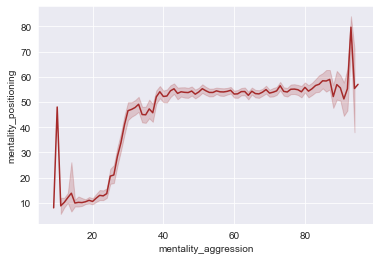

In [31]:
sns.lineplot(x='mentality_aggression',y='mentality_positioning',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the mentality aggression around 10 to 30 then the mentality positioning is low
* Below 10 mentality aggression the score of mentality positioning is slightly high. otherwise both metality positioning score is constant.

##### 21.IMPACT OF MENTALITY PENALTIES TO MENTALITY VISION

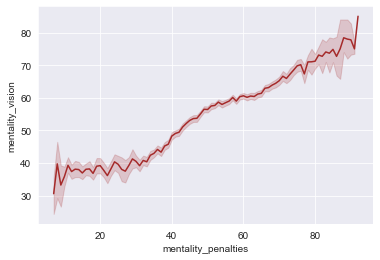

In [32]:
sns.lineplot(x='mentality_penalties',y='mentality_vision',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the penalties is increases then the mentality vision also increases.

##### 22.RELATION BETWEEN DEFENDING STANDING TACKLE & DEFENDING SLIDING TACKLE WITH RESPECT TO PREFERRED FOOT

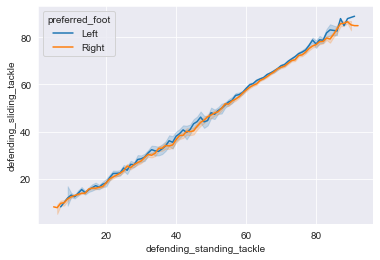

In [33]:
sns.lineplot(x='defending_standing_tackle',y='defending_sliding_tackle',data=data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If defending standing tackle is increases then the defending sliding tackle also increases with both foot.

#### CATEGORICAL VERIABLE 

##### 1.IMPACT OF INTERNATIONAL REPUTATION TO WEAK FOOT

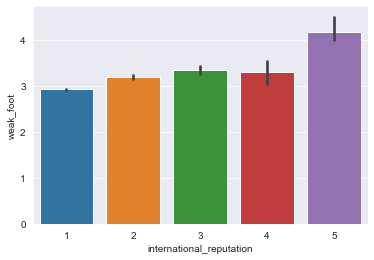

In [34]:
sns.barplot(x='international_reputation',y='weak_foot',data=data)
plt.show()

##### OBSERVATION:
* 5 Intrenational reputation rating of player has more than 4 week foot
* 1 international reputation rating player has less than 3 weak foot
* 2, 3, 4 international reputation player has constant weak foot

##### 2.IMPACT OF WORK RATE TO SKILL MOVES

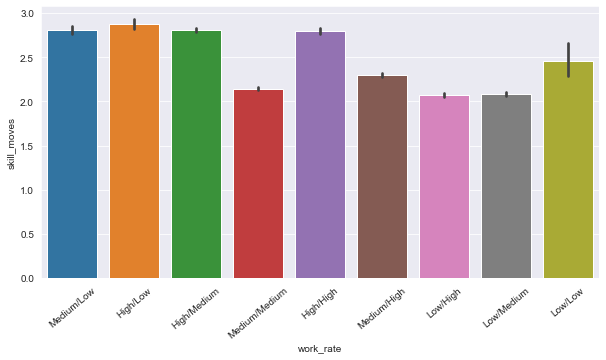

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x='work_rate',y='skill_moves',data=data)
plt.xticks(rotation=40)
plt.show()

##### OBSERVATION:
* In this plot cleary seen that 4 types of work rate[medium/low, high/low, high/medium, high/high] has more than 2.5 skill moves
* Other work rate skill moves is less than 2.5

#### 3.IMPACT OF REAL FACE TO RELEASE CLAUSE EUR

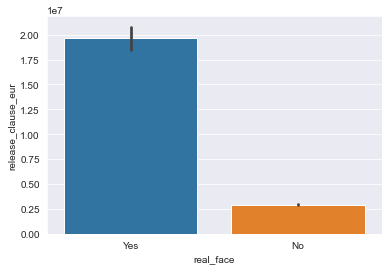

In [36]:
sns.barplot(x='real_face',y='release_clause_eur',data=data)
plt.show()

##### OBSERVATION:
* If the player face is real then the release clause is more.
* If the player face is not real then the release clause is less

##### 4.IMPACT OF PREFERRED FOOT TO PACE

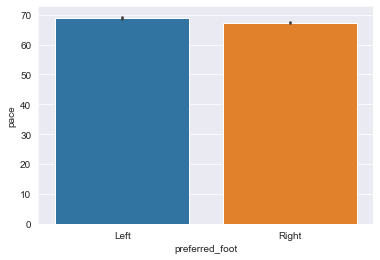

In [37]:
sns.barplot(x='preferred_foot',y='pace',data=data)
plt.show()

##### OBSERVATION:
* both left and right preferred foot player pace is same.

##### 5.IMPACT OF TEAM POSITION TO SHOOTING

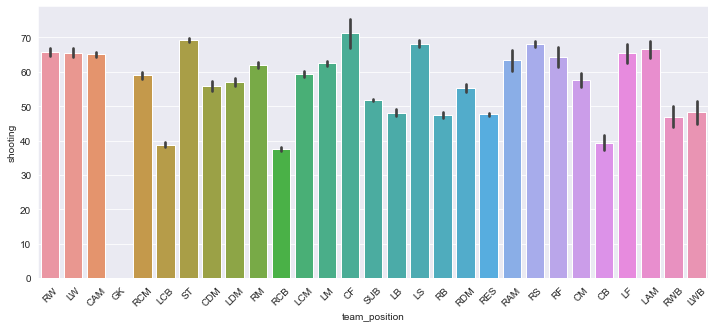

In [38]:
plt.figure(figsize=(12,5))
sns.barplot(x='team_position',y='shooting',data=data)
plt.xticks(rotation=45)
plt.show()

##### OBSERVATION:
* In this plot we clearly seent that GK team position has no shooting score.
* CF team position has maximum shooting score.


### HERE SOME CONDITION & PLOTTING
#### 1.TOP 10 NATIONALITY PLAYER

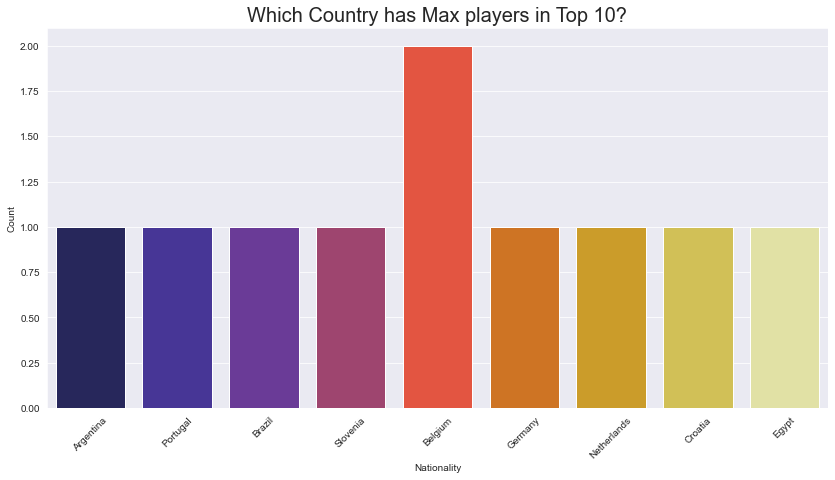

In [39]:
plt.figure(figsize=(14,7))
sns.countplot(x='nationality',data=data.head(10),palette='CMRmap')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45) # used to tild the name on x axis
plt.title('Which Country has Max players in Top 10?',fontsize = 20)
plt.show()


##### OBSERVATION:
* Most of the belgium country player in to 10

##### 2.TOP 10 CLUB PLAYER

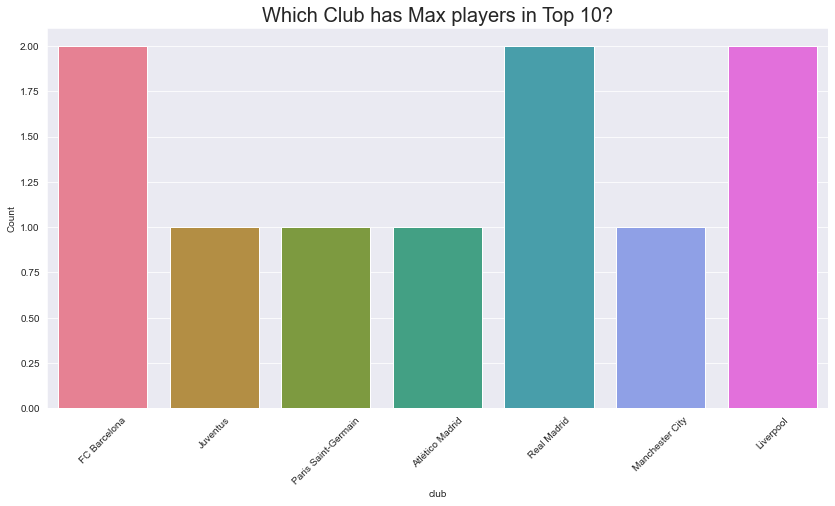

In [40]:
plt.figure(figsize=(14,7))
sns.countplot(x='club',data=data.head(10),palette='husl')
plt.xlabel('club')
plt.ylabel('Count')
plt.xticks(rotation=45) # used to tild the name on x axis
plt.title('Which Club has Max players in Top 10?',fontsize = 20)
plt.show()


##### OBSERVATION:
* most of the Fc Barcelona. real madrid, and liver pool club player in top 10.

##### 3.TEAM POSITION IN TOP 10

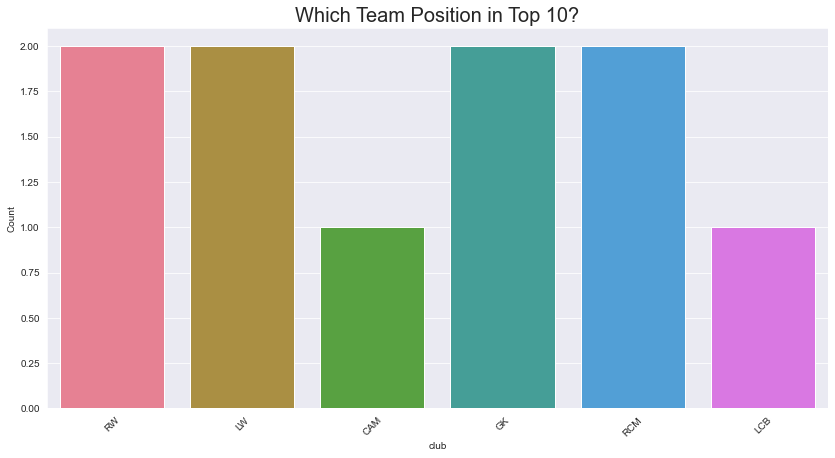

In [41]:
plt.figure(figsize=(14,7))
sns.countplot(x='team_position',data=data.head(10),palette='husl')
plt.xlabel('club')
plt.ylabel('Count')
plt.xticks(rotation=45) # used to tild the name on x axis
plt.title('Which Team Position in Top 10?',fontsize = 20)
plt.show()


##### OBSERVATION:
* Most of the RW, LW, GK, RCM  team position in top 10

##### 4.CAMPARE MESSI VS RONALDO

In [43]:
feature = data[['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']]
compare = feature.head(2)
compare = compare.set_index('short_name')
compare.head()

overall  potential  pace  shooting  passing  dribbling  \
short_name                                                                  
L. Messi                94         94  87.0      92.0     92.0       96.0   
Cristiano Ronaldo       93         93  90.0      93.0     82.0       89.0   

                   defending  physic  
short_name                            
L. Messi                39.0    66.0  
Cristiano Ronaldo       35.0    78.0

##### 5.GET TOP 5 MAXIMUM VALUE PLAYER WITH MINIMUM RELEASE

In [44]:
data.sort_values(by=['value_eur','release_clause_eur'],ascending=[0,1]).head()

sofifa_id                                         player_url  \
2      190871  https://sofifa.com/player/190871/neymar-da-sil...   
0      158023  https://sofifa.com/player/158023/lionel-messi/...   
10     231747  https://sofifa.com/player/231747/kylian-mbappe...   
5      192985  https://sofifa.com/player/192985/kevin-de-bruy...   
4      183277  https://sofifa.com/player/183277/eden-hazard/2...   

      short_name                       long_name  age         dob  height_cm  \
2      Neymar Jr   Neymar da Silva Santos Junior   27  1992-02-05        175   
0       L. Messi  Lionel Andrés Messi Cuccittini   32  1987-06-24        170   
10     K. Mbappé                   Kylian Mbappé   20  1998-12-20        178   
5   K. De Bruyne                 Kevin De Bruyne   28  1991-06-28        181   
4      E. Hazard                     Eden Hazard   28  1991-01-07        175   

    weight_kg nationality                 club  overall  potential  value_eur  \
2          68      Brazil  Paris Saint-Germain       92         92  105500000   
0          72   Argentina         FC Barcelona       94         94   95500000   
10         73      France  Paris Saint-Germain       89         95   93500000   
5          70     Belgium      Manchester City       91         91   90000000   
4          74     Belgium          Real Madrid       91         91   90000000   

    wage_eur player_positions preferred_foot  international_reputation  \
2     290000          LW, CAM          Right                         5   
0     565000       RW, CF, ST           Left                         5   
10    155000           ST, RW          Right                         3   
5     370000          CAM, CM          Right                         4   
4     470000           LW, CF          Right                         4   

    weak_foot  skill_moves    work_rate body_type real_face  \
2           5            5  High/Medium    Neymar       Yes   
0           4            4   Medium/Low     Messi       Yes   
10          4            5     High/Low    Normal       Yes   
5           5            4    High/High    Normal       Yes   
4           4            4  High/Medium    Normal       Yes   

    release_clause_eur                                        player_tags  \
2          195200000.0  Speedster, Dribbler, Playmaker  , Crosser, FK ...   
0          195800000.0  Dribbler, Distance Shooter, Crosser, FK Specia...   
10         191700000.0                       Speedster, Dribbler, Acrobat   
5          166500000.0  Dribbler, Playmaker  , Engine, Distance Shoote...   
4          184500000.0                       Speedster, Dribbler, Acrobat   

   team_position  team_jersey_number loaned_from      joined  \
2            CAM                10.0         NaN  2017-08-03   
0             RW                10.0         NaN  2004-07-01   
10            RW                 7.0         NaN  2018-07-01   
5            RCM                17.0         NaN  2015-08-30   
4             LW                 7.0         NaN  2019-07-01   

    contract_valid_until nation_position  nation_jersey_number  pace  \
2                 2022.0              LW                  10.0  91.0   
0                 2021.0             NaN                   NaN  87.0   
10                2022.0              RM                  10.0  96.0   
5                 2023.0             RCM                   7.0  76.0   
4                 2024.0              LF                  10.0  91.0   

    shooting  passing  dribbling  defending  physic  gk_diving  gk_handling  \
2       85.0     87.0       95.0       32.0    58.0        NaN          NaN   
0       92.0     92.0       96.0       39.0    66.0        NaN          NaN   
10      84.0     78.0       90.0       39.0    75.0        NaN          NaN   
5       86.0     92.0       86.0       61.0    78.0        NaN          NaN   
4       83.0     86.0       94.0       35.0    66.0        NaN          NaN   

    gk_kicking  gk_reflexes  gk_speed  gk_posit

## DATA PREPROCESSING / FEATURE ENGINEERING

### 1.CHECK MISSING VALUE

In [45]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

In [48]:
# Create function to check missing value with percentage
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
missing_value(data)

Missing Number  Missing Percentage
sofifa_id                                0            0.000000
player_url                               0            0.000000
short_name                               0            0.000000
long_name                                0            0.000000
age                                      0            0.000000
dob                                      0            0.000000
height_cm                                0            0.000000
weight_kg                                0            0.000000
nationality                              0            0.000000
club                                     0            0.000000
overall                                  0            0.000000
potential                                0            0.000000
value_eur                                0            0.000000
wage_eur                                 0            0.000000
player_positions                         0            0.000000
preferred_foot                           0            0.000000
international_reputation                 0            0.000000
weak_foot                                0            0.000000
skill_moves                              0            0.000000
work_rate                                0            0.000000
body_type                                0            0.000000
real_face                                0            0.000000
release_clause_eur                    1298            7.101433
player_tags                          16779           91.798884
team_position                          240            1.313054
team_jersey_number                     240            1.313054
loaned_from                          17230           94.266331
joined                                1288            7.046723
contract_valid_until                   240            1.313054
nation_position                      17152           93.839589
nation_jersey_number                 17152           93.839589
pace                                  2036           11.139074
shooting                              2036           11.139074
passing                               2036           11.139074
dribbling                             2036           11.139074
defending                             2036           11.139074
physic                                2036           11.139074
gk_diving                            16242           88.860926
gk_handling                          16242           88.860926
gk_kicking                           16242           88.860926
gk_reflexes                          16242           88.860926
gk_speed                             16242           88.860926
gk_positioning                       16242           88.860926
player_traits                        10712           58.605974
attacking_crossing                       0            0.000000
attacking_finishing                      0            0.000000
attacking_heading_accuracy               0            0.000000
attacking_short_passing                  0            0.000000
attacking_volleys                        0            0.000000
skill_dribbling                          0            0.000000
skill_curve                              0            0.000000
skill_fk_accuracy                        0            0.000000
skill_long_passing                       0            0.000000
skill_ball_control                       0            0.000000
movement_acceleration                    0            0.000000
movement_sprint_speed                    0            0.000000
movement_agility                         0            0.000000
movement_reactions                       0            0.000000
movement_balance                         0            0.000000
power_shot_power                         0            0.000000
power_jumping                            0            0.000000
power_stamina                            0            0.000000
power_strength                           0            0.000

* 11 Features has more than 50% to 90% missing value and some unique feature also contain missing value so we drop this feature.
* Remaining feature missing value is less than 15% so we impute the missing value.

### 2.IMPUTE MISSING VALUE
##### CHECKING THE DISTRIBUTION BEFORE IMPUTE MISSING VALUE
##### 1.NUMERICAL

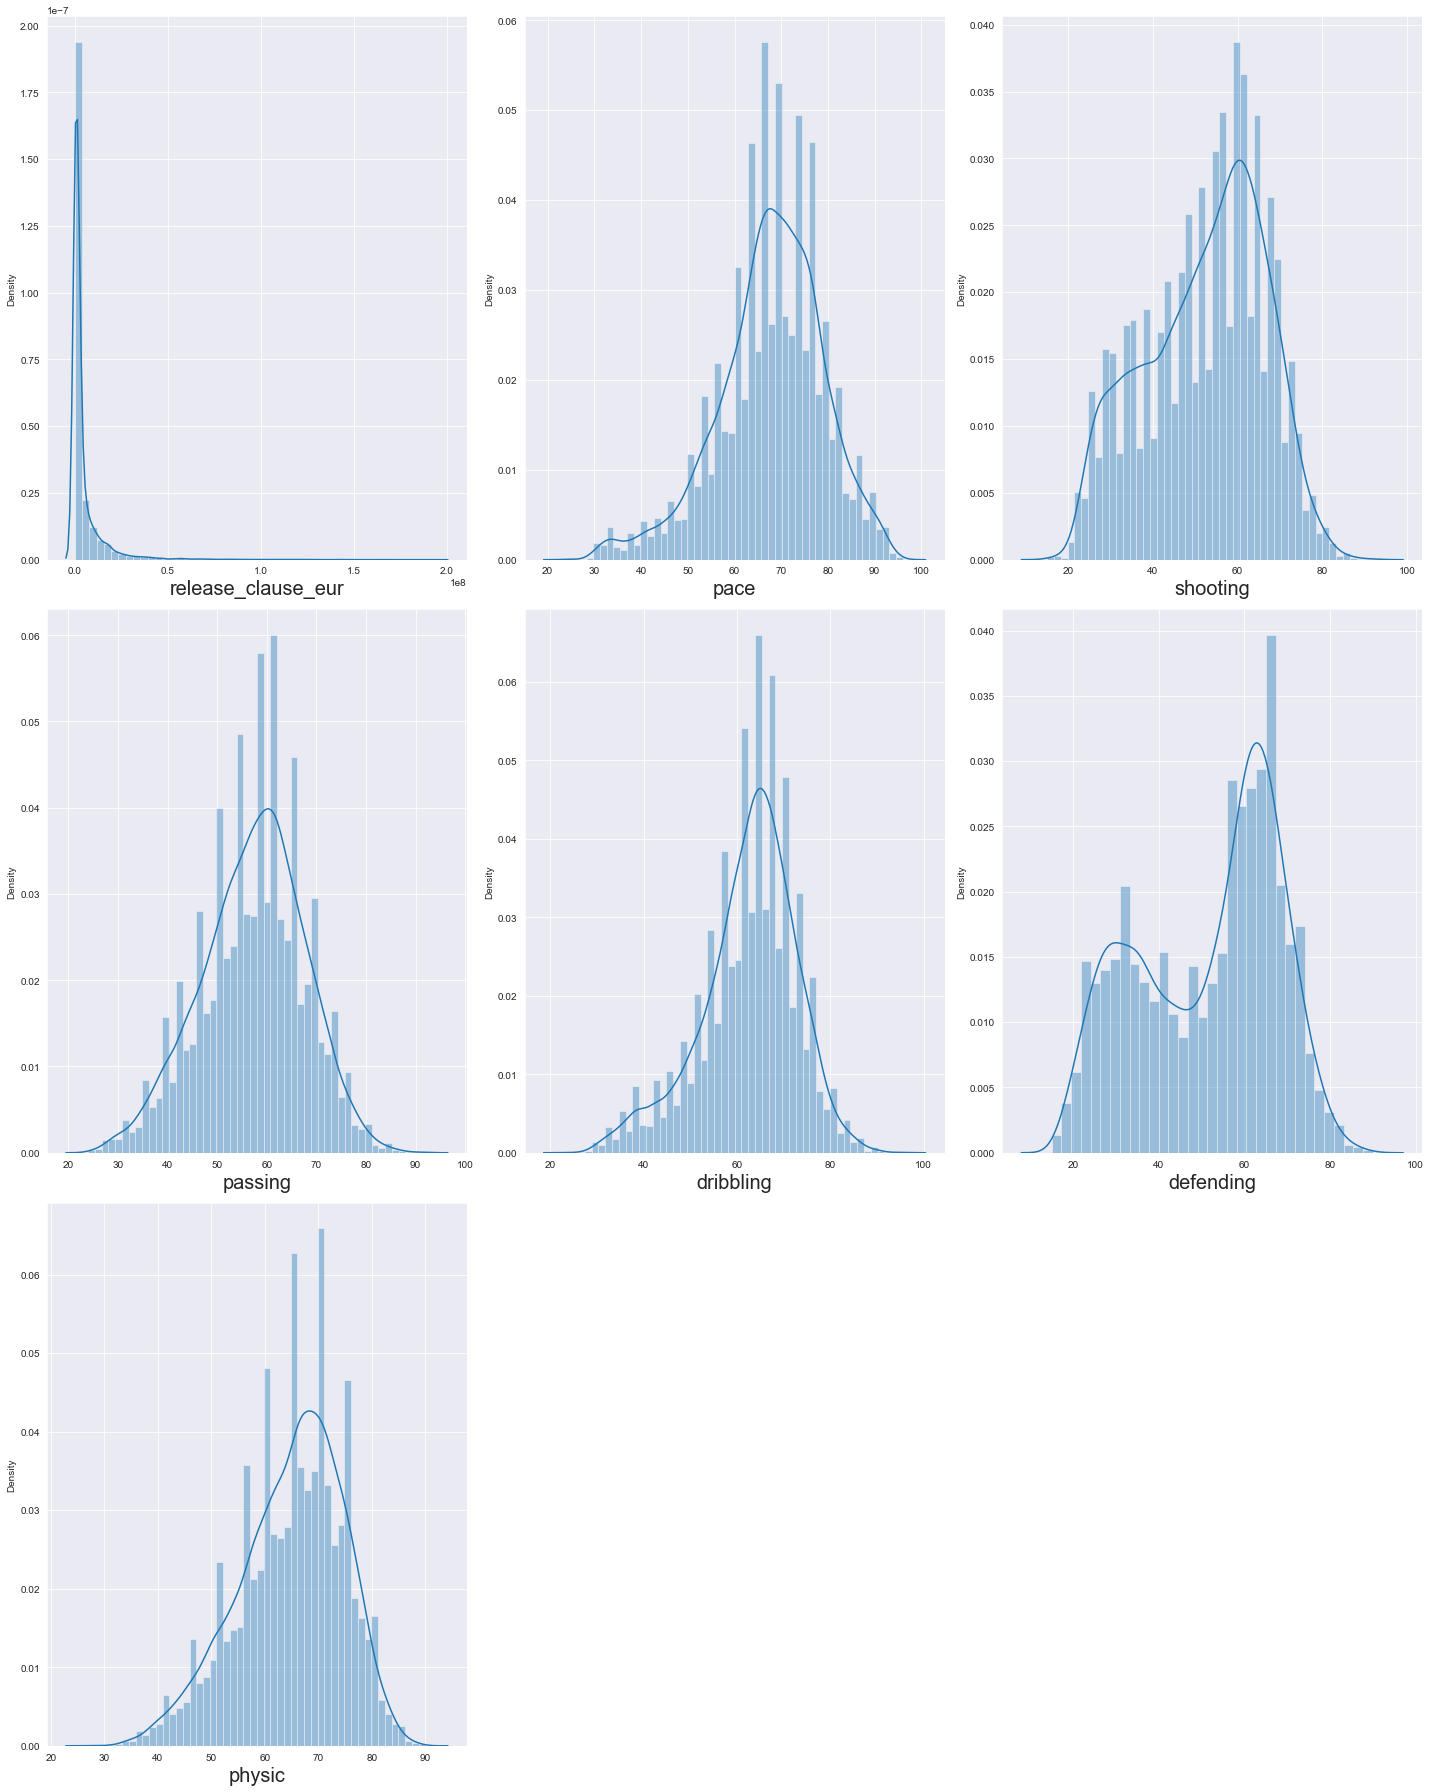

In [49]:
dist = data[['release_clause_eur','pace','shooting','passing','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in dist: # iteration of columns / acessing the columns from  dataset 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 36 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=dist[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


In [5]:
# Impute missing value using median because distribution is not normal
data.loc[data['release_clause_eur'].isnull()==True,'release_clause_eur']=data['release_clause_eur'].median()
data.loc[data['pace'].isnull()==True,'pace']=data['pace'].median()
data.loc[data['shooting'].isnull()==True,'shooting']=data['shooting'].median()
data.loc[data['passing'].isnull()==True,'passing']=data['passing'].median()
data.loc[data['dribbling'].isnull()==True,'dribbling']=data['dribbling'].median()
data.loc[data['defending'].isnull()==True,'defending']=data['defending'].median()
data.loc[data['physic'].isnull()==True,'physic']=data['physic'].median()


In [6]:
# Check missing value after imputation
print('release_clause_eur:',data['release_clause_eur'].isnull().sum())
print('pace:',data['pace'].isnull().sum())
print('shooting:',data['shooting'].isnull().sum())
print('passing:',data['passing'].isnull().sum())
print('dribbling:',data['dribbling'].isnull().sum())
print('defending:',data['defending'].isnull().sum())
print('physic:',data['physic'].isnull().sum())

release_clause_eur: 0
pace: 0
shooting: 0
passing: 0
dribbling: 0
defending: 0
physic: 0


##### 2.CATEGORICAL

In [7]:
# Get the value counts
data.team_position.value_counts().head()

SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
Name: team_position, dtype: int64

In [8]:
# Impute categorical data using mode(most freqent)
data['team_position'] = data['team_position'].replace(np.nan,'SUB')

In [9]:
# Check missing value after imputation
data['team_position'].isnull().sum()

0

### 3.HANDLING CATEGORICAL DATA

* In this data only preferred foot and team position feature is impoertant and remaining all feature is unique.

##### 1.PREFERRED FOOT 

In [10]:
# Gettimg value counts of preferred foot
data.preferred_foot.value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

In [11]:
# right is assign with 1 because of majority and most freqent
# left is assign with 0 because of less no
data.preferred_foot = data.preferred_foot.map({'Right':1,'Left':0})

##### 2.TEAM POSITION

In [12]:
# Getting the value counts of team position
data.team_position.value_counts()

SUB    8060
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: team_position, dtype: int64

In [13]:
# Use mannual encoding because lots of labels avialble
data.team_position = data.team_position.map({'SUB':28,'RES':27,'GK':26,'RCB':25,'LCB':24,'RB':23,'LB':22,'ST':21,
                                            'RCM':20,'LCM':19,'RM':18,'LM':17,'CAM':16,'RDM':15,'LDM':14,'RS':13,
                                            'LS':12,'CDM':11,'LW':10,'RW':9,'CB':8,'CM':7,'RWB':6,'LWB':5,'RAM':4,
                                            'LAM':3,'RF':2,'LF':1,'CF':0})

In [14]:
data.team_position.unique()

array([ 9, 10, 16, 26, 20, 24, 21, 11, 14, 18, 25, 19, 17,  0, 28, 22, 12,
       23, 15, 27,  4, 13,  2,  7,  8,  1,  3,  6,  5], dtype=int64)

### 4.OUTLIER HANDLING

* In this data we are handle only important feature outlier, because the remaining feature is unique or some feature is not reuired to handle outlier

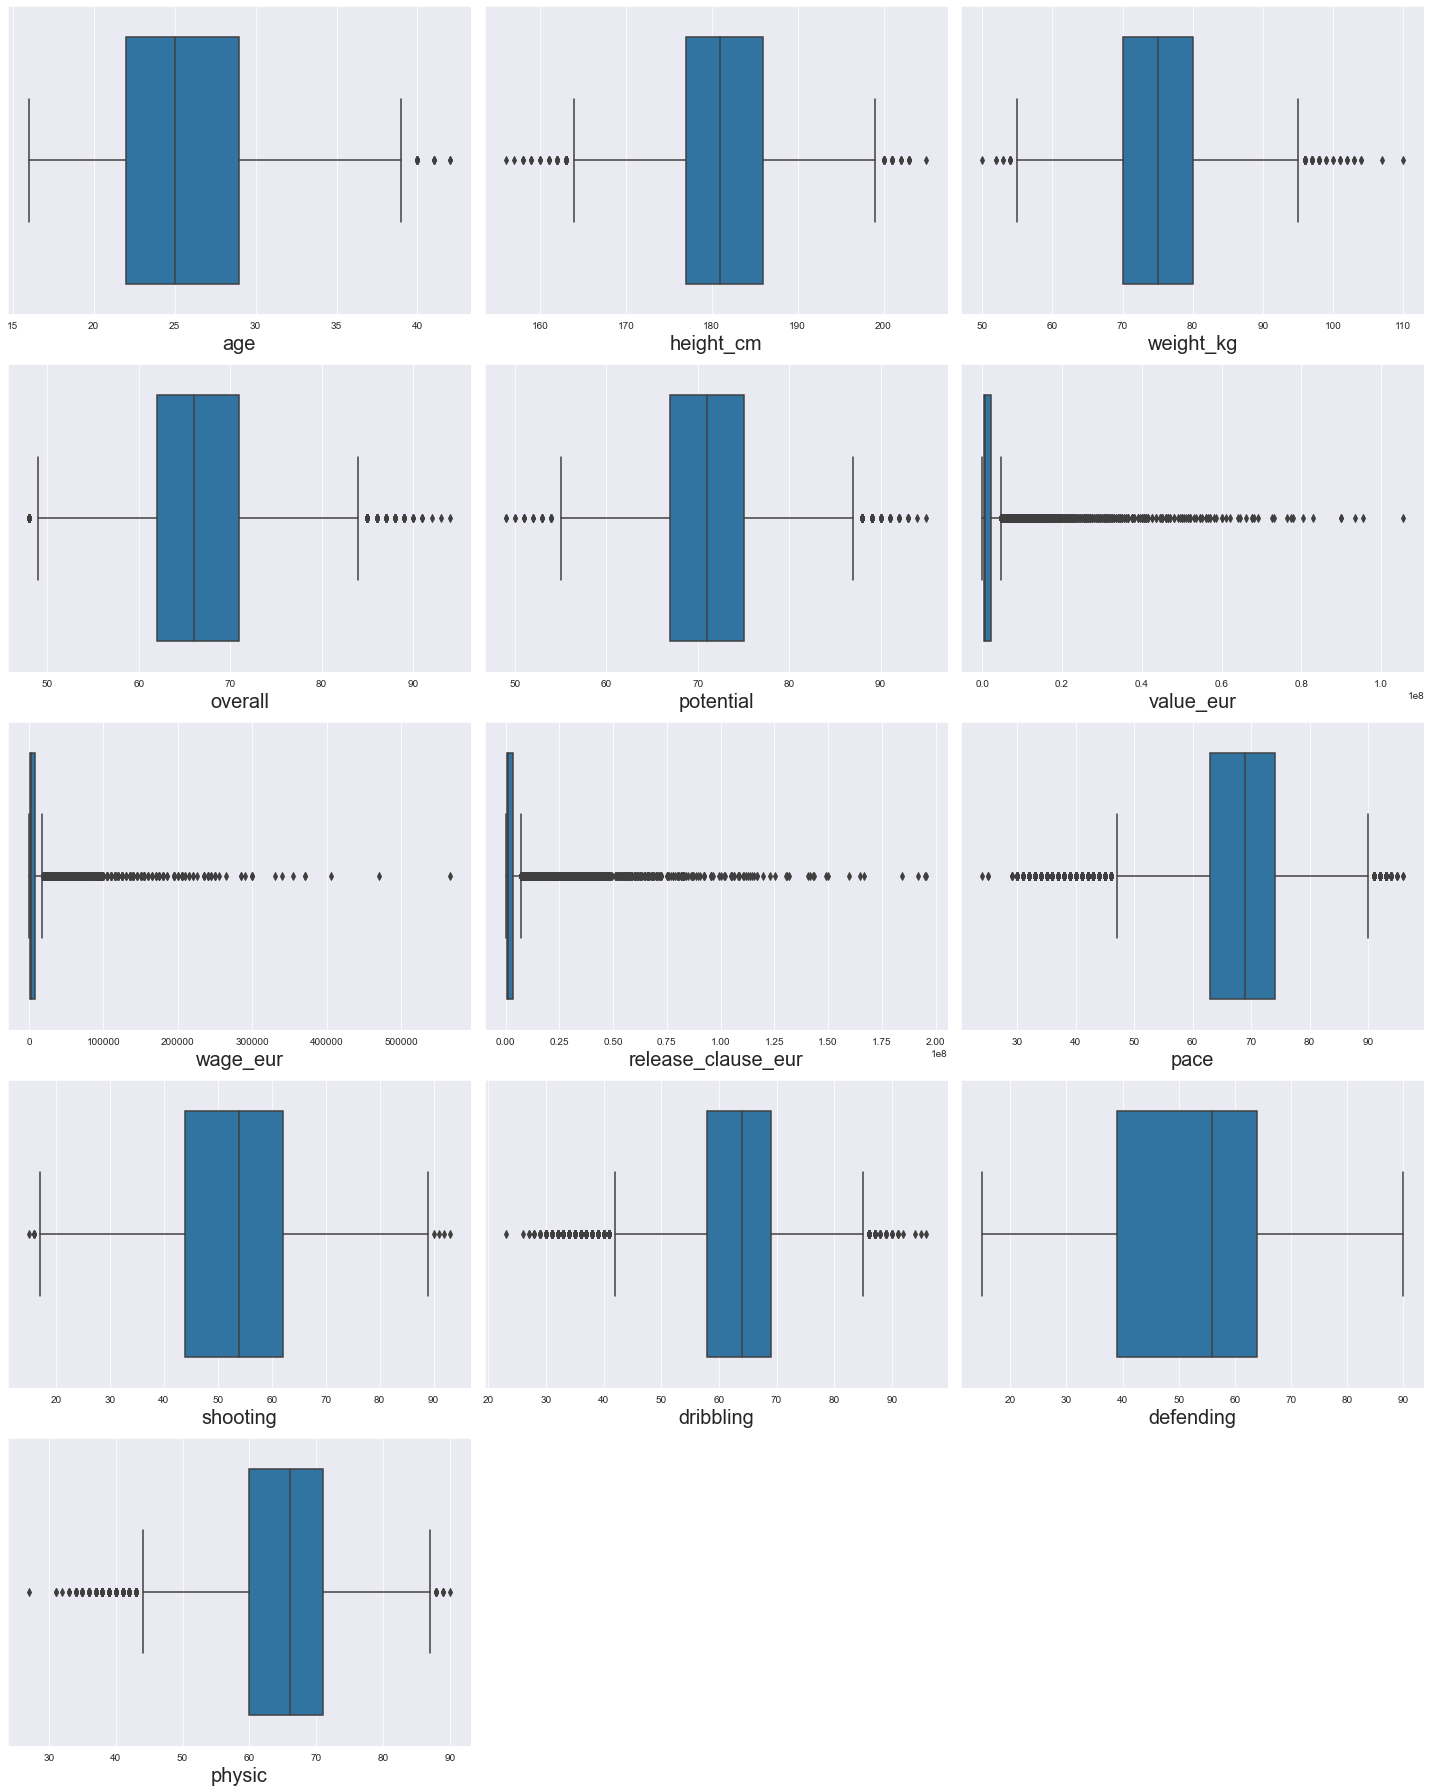

In [60]:
out = data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=16:    # set the limit
        plt.subplot(5,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.boxplot(x=out[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction



##### CHECKING THE DISTRIBUTION BEFORE HANDLE THE OUTLIER

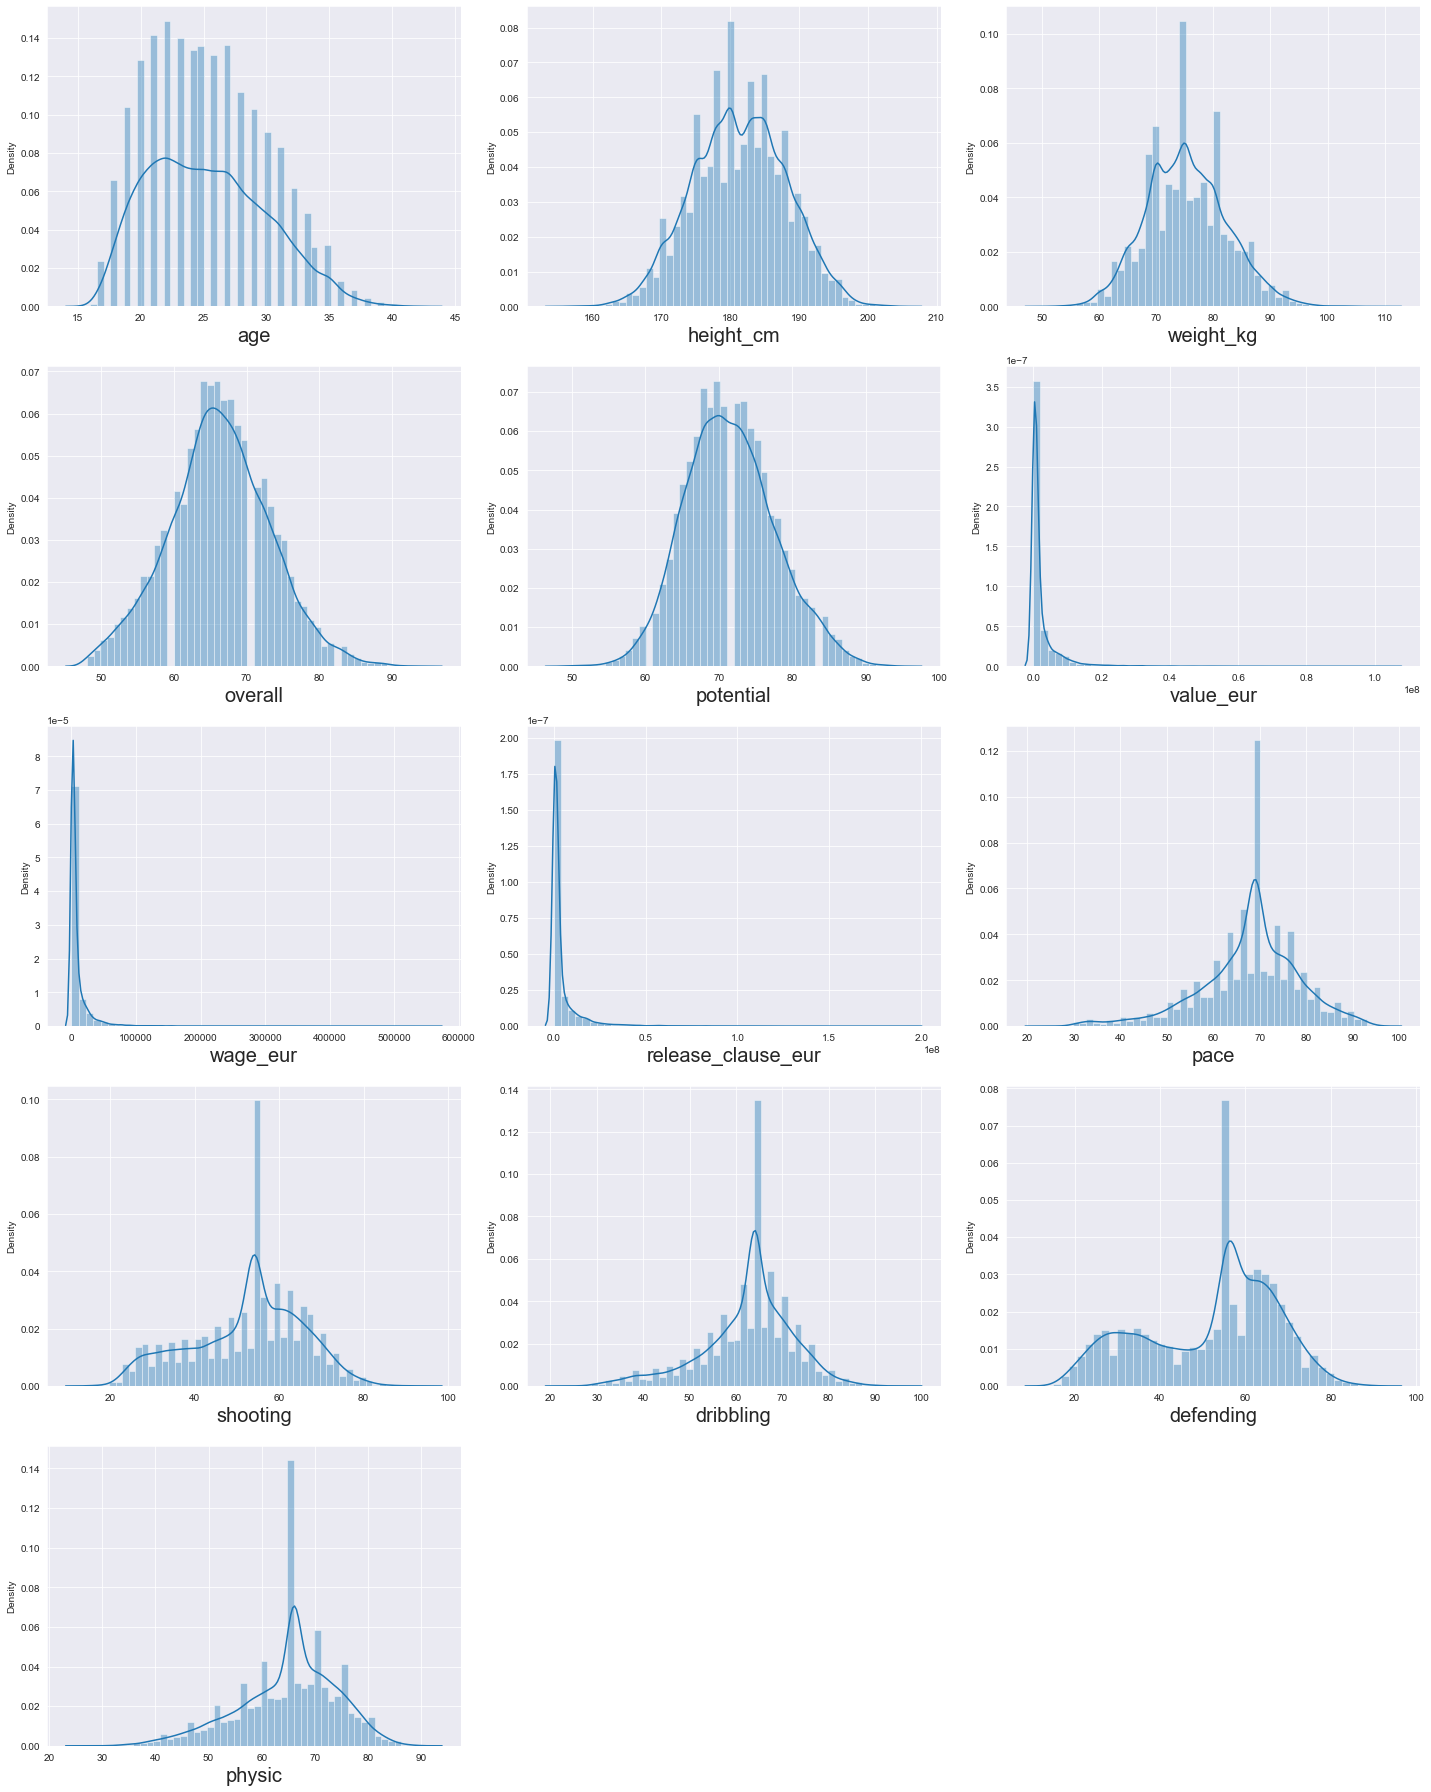

In [61]:
dist1 = data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in dist1: # iteration of columns / acessing the columns from  dataset 
    if plotno<=15:    # set the limit
        plt.subplot(5,3,plotno) # # plotting 36 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=out[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction



* Here age,height_cm,weight_kg,overall,potential is follow a normal distribution so we are empherical rule and remaining feature we use iqr

##### EMPHERICAL RULE OR 3 STANDARD DEVIATION RULE TO DETECT THE OUTLIER

##### 1.AGE

In [15]:
upper_limit = data.age.mean() + 3*data.age.std()
print("Upper limit:",upper_limit)
lower_limit = data.age.mean() - 3*data.age.std()
print("Lower limit:",lower_limit)

Upper limit: 39.25418488202056
Lower limit: 11.312397895088532


In [16]:
# Getting the percentage of outlier
len(data.loc[data['age'] > upper_limit])/18278*100
# In age feature less than 5% outlier we are impute the outlier

0.10395010395010396

In [17]:
# impute outlier with mean because feature follow a normal distribution and continous data
data.loc[data['age'] > upper_limit,'age']=data['age'].mean()

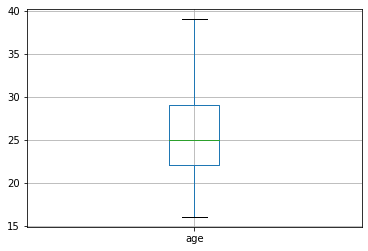

In [18]:
data.boxplot('age')
plt.show()

* Outlier impute successfully

##### 2.HEIGHT CM

In [19]:
upper_limit = data.height_cm.mean() + 3*data.height_cm.std()
print("Upper limit:",upper_limit)
lower_limit = data.height_cm.mean() - 3*data.height_cm.std()
print("Lower limit:",lower_limit)

Upper limit: 201.6330681374958
Lower limit: 161.09129995529332


In [20]:
# Checking the percentage of outlier
len(data.loc[data['height_cm'] > upper_limit])/18278*100

0.06018163912900754

In [21]:
# impute outlier both lower and upper side
data.loc[data['height_cm'] <  lower_limit,'height_cm'] = data['height_cm'].mean()
data.loc[data['height_cm'] > upper_limit,'height_cm'] = data['height_cm'].mean()

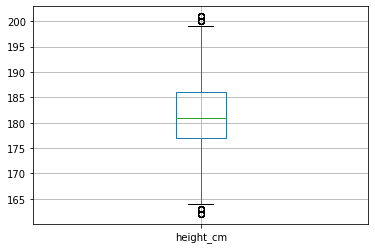

In [22]:
data.boxplot('height_cm')
plt.show()

* Outlier is impute but box plot are show outlier

##### 3.WEIGHT KG

In [23]:
upper_limit = data.weight_kg.mean() + 3*data.weight_kg.std()
print("Upper limit:",upper_limit)
lower_limit = data.weight_kg.mean() - 3*data.weight_kg.std()
print("Lower limit:",lower_limit)

Upper limit: 96.41957385582987
Lower limit: 54.13311243369853


In [24]:
# Lower limit percentage
len(data.loc[data['weight_kg'] < lower_limit])/18278*100

0.06018163912900754

In [25]:
# upper limit percentage
len(data.loc[data['weight_kg'] > upper_limit])/18278*100

0.22431338220811906

In [26]:
# impute outlier 
data.loc[data['weight_kg'] < lower_limit,'weight_kg']=data['weight_kg'].mean()
data.loc[data['weight_kg'] > upper_limit,'weight_kg']=data['weight_kg'].mean()

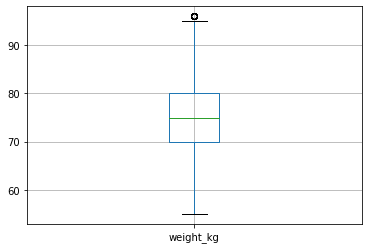

In [27]:
data.boxplot('weight_kg')
plt.show()

* Outlier is removed successfully

##### 4.OVERALL

In [28]:
upper_limit = data.overall.mean() + 3*data.overall.std()
print("Upper limit:",upper_limit)
lower_limit = data.overall.mean() - 3*data.overall.std()
print("Lower limit:",lower_limit)

Upper limit: 87.09485374672605
Lower limit: 45.395134216946126


In [29]:
data.loc[data['overall'] < lower_limit]
# no outlier in lower limit

Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, ...]
Index: []

In [30]:
# Get the percentage of outlier
len(data.loc[data['overall'] > upper_limit])/18278*100

0.218842324105482

In [31]:
data.loc[data['overall'] > upper_limit, 'overall'] = data['overall'].mean()

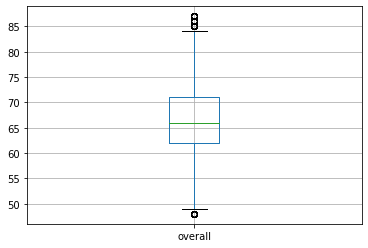

In [32]:
data.boxplot('overall')
plt.show()

##### 5.POTENTIAL

In [33]:
upper_limit = data.potential.mean() + 3*data.potential.std()
print("Upper limit:",upper_limit)
lower_limit = data.potential.mean() - 3*data.potential.std()
print("Lower limit:",lower_limit)

Upper limit: 89.96589419280835
Lower limit: 53.12787974307086


In [34]:
# Lower limit
len(data.loc[data['potential'] < lower_limit])/18278*100

0.09300798774482985

In [35]:
# upperlimit
len(data.loc[data['potential'] > upper_limit])/18278*100

0.21337126600284498

In [36]:
# impute outlier
data.loc[data['potential'] < lower_limit,'potential']=data['potential'].mean()
data.loc[data['potential'] > upper_limit,'potential']=data['potential'].mean()

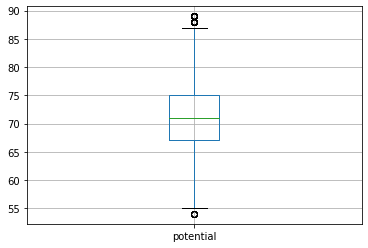

In [37]:
data.boxplot('potential')
plt.show()

##### INRET QUATIEL RANGE (IQR)

##### 1.VALUE EUR

In [38]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['value_eur'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['value_eur'].quantile(0.25)  # first quantile
Q3 = data['value_eur'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 1775000.0
minimum limit -2337500.0
maximum limit 4762500.0


In [39]:
# get the percentage
len(data.loc[data['value_eur'] > max_limit])/18278*100

13.737826895721634

* Here outlier is more than 5% so we not impute the outlier

##### 2.WAGE EUR

In [40]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['wage_eur'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['wage_eur'].quantile(0.25)  # first quantile
Q3 = data['wage_eur'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)

max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 7000.0
minimum limit -9500.0
maximum limit 18500.0


In [41]:
len(data.loc[data['wage_eur'] > max_limit])/18278*100

12.911697122223437

* Here also outlier is more than 5% so we dont impute the outlier

##### 3.RELEASE CLASUSE EUR

In [42]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['release_clause_eur'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['release_clause_eur'].quantile(0.25)  # first quantile
Q3 = data['release_clause_eur'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 2604000.0
minimum limit -3310000.0
maximum limit 7106000.0


In [43]:
len(data.loc[data['release_clause_eur'] > max_limit])/18278*100

15.368202210307475

* Here also outlier is more than 5% so we dont impute the outlier

##### 4.PACE

In [44]:
# Use iqr because of some left skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['pace'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['pace'].quantile(0.25)  # first quantile
Q3 = data['pace'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 11.0
minimum limit 46.5
maximum limit 90.5


In [45]:
# min limit
len(data.loc[data['pace'] < min_limit])/18278*100

4.19083050661998

In [46]:
# max limit
len(data.loc[data['pace'] > max_limit])/18278*100

1.0285589232957655

In [47]:
# impute outlier both side
data.loc[data['pace'] < min_limit,'pace'] = data['pace'].median()
data.loc[data['pace'] > max_limit,'pace'] = data['pace'].median()

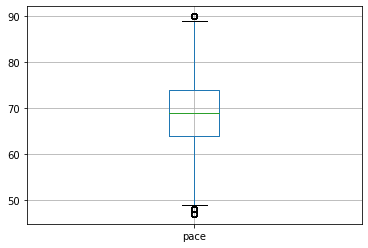

In [48]:
# box plot after impute the outlier
data.boxplot('pace')
plt.show()

* Outlier is impute successfully, but box plot is show outlier

##### 5.SHOOTING

In [49]:
# Use iqr because of some left skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['shooting'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['shooting'].quantile(0.25)  # first quantile
Q3 = data['shooting'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 18.0
minimum limit 17.0
maximum limit 89.0


In [50]:
# min limit percentage
len(data.loc[data['shooting'] < min_limit])/18278*100

0.02735529051318525

In [51]:
# max limit percentage
len(data.loc[data['shooting'] > max_limit])/18278*100

0.0218842324105482

In [52]:
# impute the outlier
data.loc[data['shooting'] < min_limit,'shooting'] = data['shooting'].median()
data.loc[data['shooting'] > max_limit,'shooting'] = data['shooting'].median()

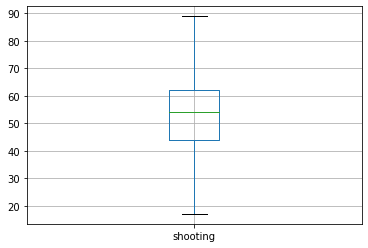

In [53]:
# boxplot
data.boxplot('shooting')
plt.show()

##### 6.DRIBBLING

In [54]:
# Use iqr because of some left skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['dribbling'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['dribbling'].quantile(0.25)  # first quantile
Q3 = data['dribbling'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 11.0
minimum limit 41.5
maximum limit 85.5


In [55]:
# min limit percentage
len(data.loc[data['shooting'] < min_limit])/18278*100

21.80763759711128

* Here the minimum limit percentage is 21 percent so we dont impute the outlier

In [56]:
# max limit percentage
len(data.loc[data['shooting'] > max_limit])/18278*100

0.0656526972316446

* Here the percentage is less than 5% so we impute the outlier in max limit

In [57]:
# impute outlier
data.loc[data['dribbling'] > max_limit,'dribbling']=data['dribbling'].median()

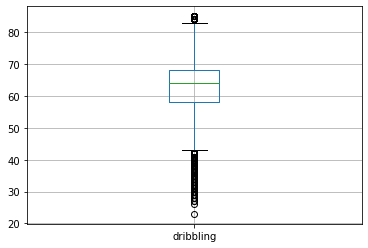

In [58]:
# box plot
data.boxplot('dribbling')
plt.show()

* Outlier is impute sucessfully.

##### 7.PHYSIC

In [59]:
# Use iqr because of some left skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['physic'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['physic'].quantile(0.25)  # first quantile
Q3 = data['physic'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 11.0
minimum limit 43.5
maximum limit 87.5


In [60]:
# min limit percentage
len(data.loc[data['physic'] < min_limit])/18278*100

2.303315461210198

In [61]:
# max limit percentage
len(data.loc[data['physic'] > max_limit])/18278*100

0.0656526972316446

In [62]:
# impute outlier
data.loc[data['physic'] < min_limit,'physic']=data['physic'].median()
data.loc[data['physic'] > max_limit,'physic']=data['physic'].median()

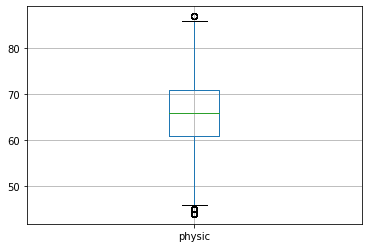

In [63]:
# boxplot
data.boxplot('physic')
plt.show()

* Outlier is impute successfull, this outlier is shown after impute the outlier.

##### CHECKING DISTRIBUTION AFTER IMPUTE OUTLIER

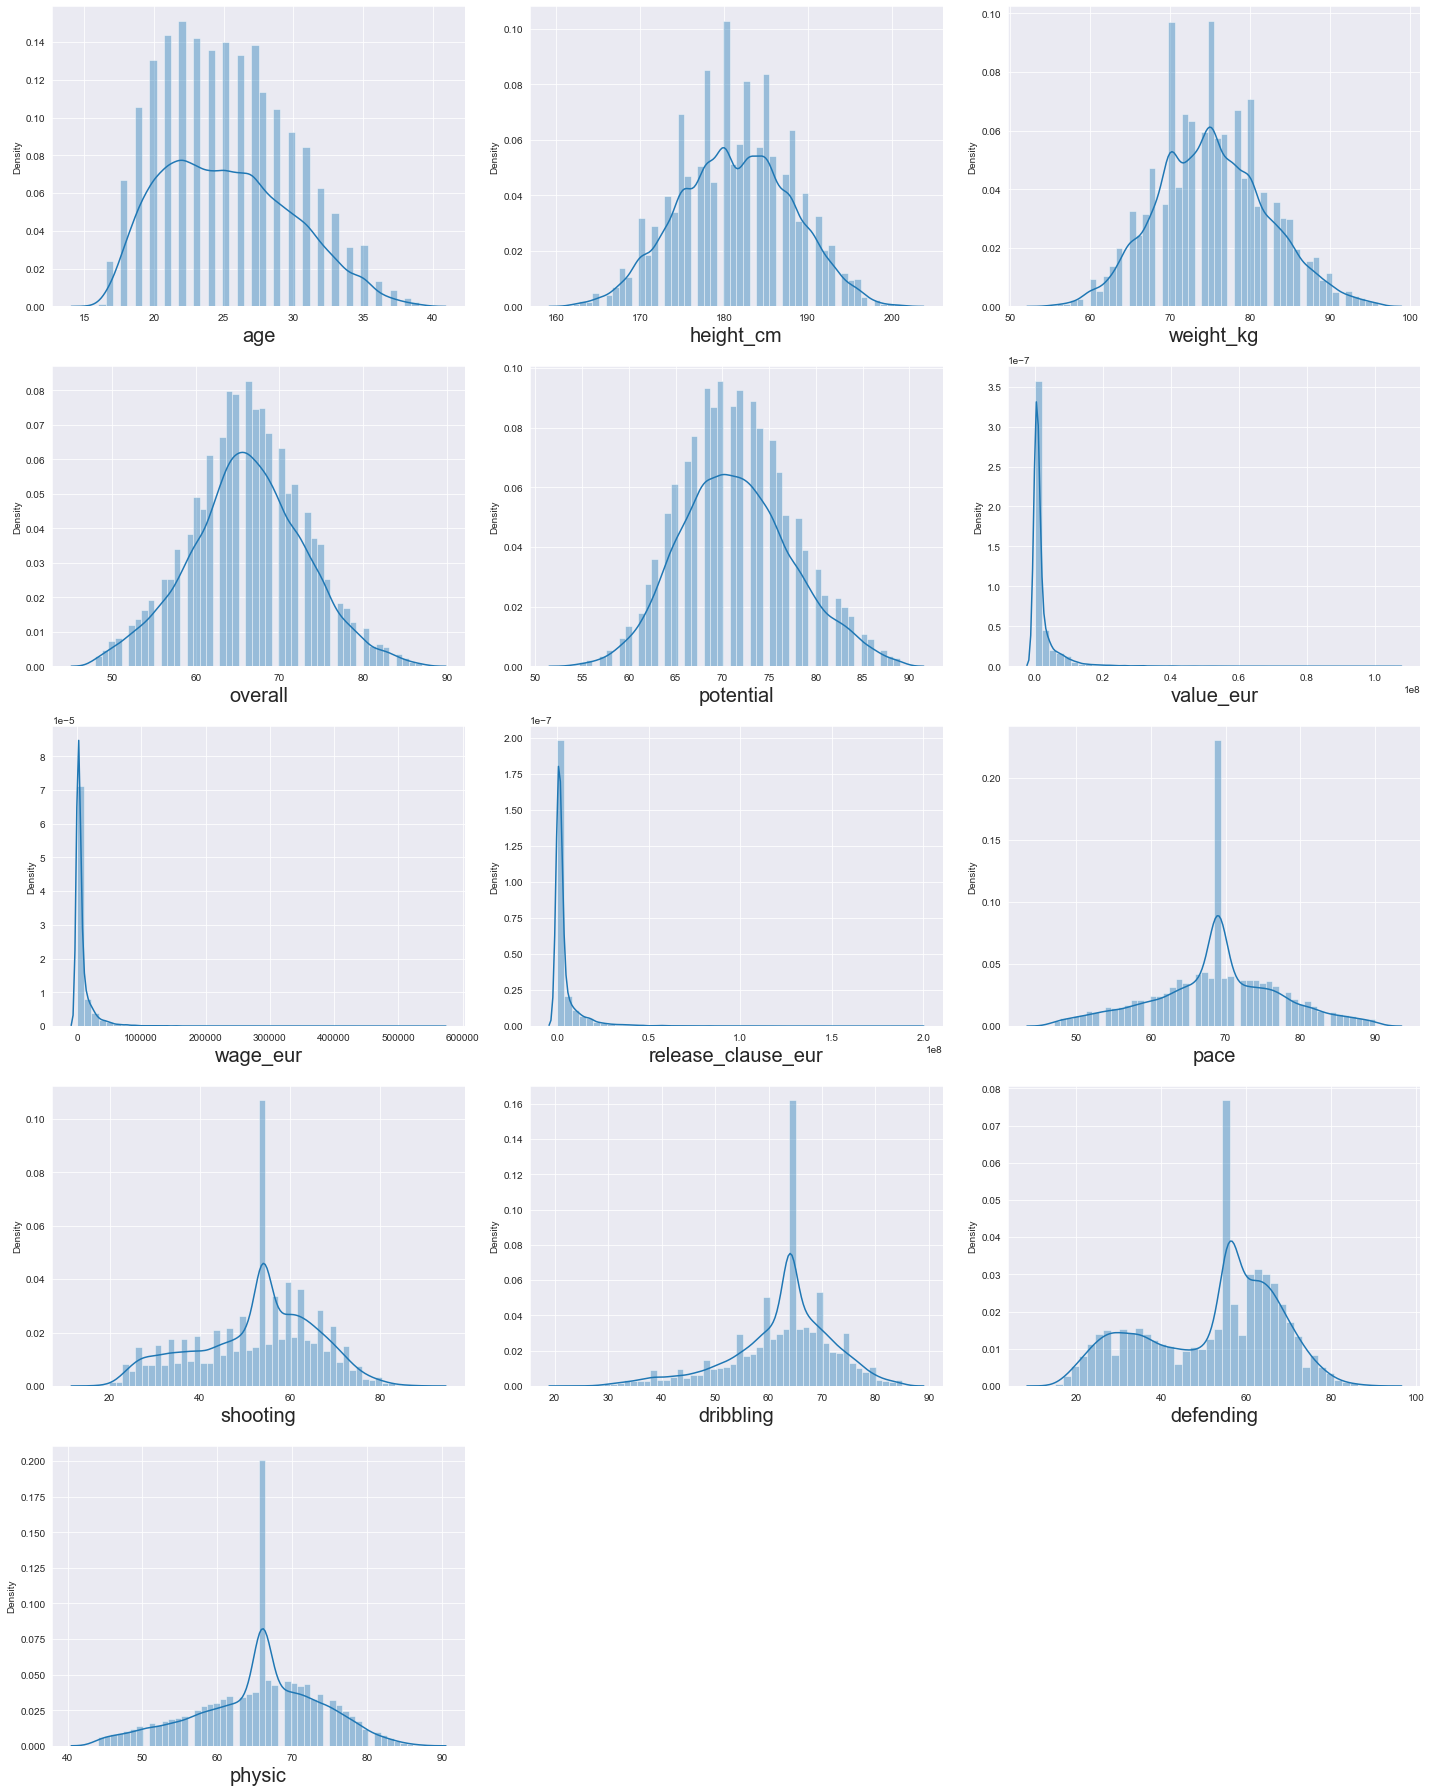

In [111]:
dist2 = data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in dist2: # iteration of columns / acessing the columns from  dataset 
    if plotno<=15:    # set the limit
        plt.subplot(5,3,plotno) # # plotting 13 graphs (5-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=dist2[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction



### 5.FEATURE SCALING


#### MIN-MAX SCALING
* Scale the feature between 0 t0 1
* Only scale the continous feature
* Use min max scaling because of dataset contain large amount of outlier so outlier is going to be biased.

In [64]:
# Scale only continous feature in nature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Object Creation
data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur',
    'pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_crossing',
    'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
    'skill_dribbling','skill_curve','skill_fk_accuracy','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed',
    'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
    'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
    'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
    'goalkeeping_kicking','goalkeeping_positioning',
    'goalkeeping_reflexes']]=scaler.fit_transform(data[['age','height_cm','weight_kg','overall','potential',
                'value_eur','wage_eur','release_clause_eur','pace','shooting','passing','dribbling','defending',
                'physic','attacking_crossing','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
                'skill_fk_accuracy','skill_long_passing','skill_ball_control','skill_ball_control','movement_acceleration',
                'movement_sprint_speed','movement_agility','movement_reactions','movement_balance',
                'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression',
                'mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties',
                'mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle',
                'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']])

In [65]:
data.head(1)

sofifa_id                                         player_url short_name  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name       age         dob  height_cm  weight_kg  \
0  Lionel Andrés Messi Cuccittini  0.695652  1987-06-24   0.205128   0.414634   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona  0.46782   0.501872   0.905213       1.0   

  player_positions  preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST               0                         5          4   

   skill_moves   work_rate body_type real_face  release_clause_eur  \
0            4  Medium/Low     Messi       Yes                 1.0   

                                         player_tags  team_position  \
0  Dribbler, Distance Shooter, Crosser, FK Specia...              9   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   

  nation_position  nation_jersey_number      pace  shooting  passing  \
0             NaN                   NaN  0.930233  0.513889      1.0   

   dribbling  defending    physic  gk_diving  gk_handling  gk_kicking  \
0    0.66129       0.32  0.511628        NaN          NaN         NaN   

   gk_reflexes  gk_speed  gk_positioning  \
0          NaN       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...            0.943182   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                  1.0                    0.738636                      1.0   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0           0.977011              1.0     0.988636                1.0   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                 1.0                 1.0               0.929412   

   movement_sprint_speed  movement_agility  movement_reactions  \
0               0.858824          0.964706            0.986667   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0          0.976471          0.888889       0.644737       0.741176   

   power_strength  power_long_shots  mentality_aggression  \
0        0.623377               1.0              0.453488   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                  0.41573               0.989247               1.0   

   mentality_penalties  mentality_composure  defending_marking  \
0                  0.8                  1.0           0.344086   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                   0.367816                  0.264368             0.05618   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0               0.10989             0.152174                 0.144444   

   goalkeeping_reflexes  ls  st  rs  lw  lf  cf  rf  rw lam cam ram  lm lcm  \
0              0.076923  89  89  89  93  93  93  93  93  93  93  93  92  87   

   cm rcm  rm lwb ldm cdm rdm rwb  lb lcb  cb rcb  rb  
0  87  87  92  68  66  66  66  68  63  52  52  52  63

## FEATURE SELECTION

### 1.DROP UNIQUE AND CONSTANT FEATURE

* Here we are going to drop unique column as well as lots of missing value column.
* The column ls,st,rs,lw,cf etc.. are playing position in the game and the data in this columns is basically the potential of the player if were to play in that position, so we assume the player only playes with the team position and we will drop this column

In [66]:
# Drop column
data.drop(['sofifa_id','player_url','short_name','long_name','dob','nationality','club','player_positions','body_type',
          'real_face','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position',
          'nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',
          'player_traits','ls','st','rs','lw','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
          'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','lf','work_rate'],axis=1,inplace=True)

In [115]:
data.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0  0.695652   0.205128   0.414634  0.46782   0.501872   0.905213  1.000000   
1  0.782609   0.641026   0.682927  0.46782   0.501872   0.554502  0.716814   
2  0.478261   0.333333   0.317073  0.46782   0.501872   1.000000  0.513274   
3  0.434783   0.666667   0.780488  0.46782   0.501872   0.734597  0.221239   
4  0.521739   0.333333   0.463415  0.46782   0.501872   0.853081  0.831858   

   preferred_foot  international_reputation  weak_foot  skill_moves  \
0               0                         5          4            4   
1               1                         5          4            5   
2               1                         5          5            5   
3               1                         3          3            1   
4               1                         4          4            4   

   release_clause_eur  team_position      pace  shooting   passing  dribbling  \
0            1.000000              9  0.930233  0.513889  1.000000    0.66129   
1            0.492816             10  1.000000  0.513889  0.852941    0.66129   
2            0.996935             16  0.511628  0.944444  0.926471    0.66129   
3            0.841154             26  0.511628  0.513889  0.500000    0.66129   
4            0.942284             10  0.511628  0.916667  0.911765    0.66129   

   defending    physic  attacking_crossing  attacking_finishing  \
0   0.320000  0.511628            0.943182             1.000000   
1   0.266667  0.790698            0.897727             0.989247   
2   0.226667  0.325581            0.931818             0.913978   
3   0.546667  0.511628            0.090909             0.096774   
4   0.266667  0.511628            0.863636             0.881720   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                    0.738636                 1.000000           0.977011   
1                    0.954545                 0.894118           0.965517   
2                    0.647727                 0.941176           0.965517   
3                    0.113636                 0.423529           0.114943   
4                    0.636364                 0.964706           0.919540   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0         1.000000     0.988636           1.000000            1.000000   
1         0.913978     0.852273           0.800000            0.821429   
2         0.989247     0.931818           0.922222            0.869048   
3         0.086022     0.079545           0.111111            0.380952   
4         0.978495     0.875000           0.833333            0.892857   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0            1.000000               0.929412               0.858824   
1            0.956044               0.905882               0.941176   
2            0.989011               0.964706               0.917647   
3            0.274725               0.364706               0.576471   
4            0.978022               0.964706               0.905882   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0          0.964706            0.986667          0.976471          0.888889   
1          0.894118            1.000000          0.694118          1.000000   
2          1.000000            0.946667          0.847059          0.814815   
3          0.658824            0.893333          0.435294          0.555556   
4          0.988235            0.920000          0.964706          0.839506   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0       0.644737       0.741176        0.623377          1.000000   
1       1.000000       0.858824        0.753247          0.988889   
2       0.552632       0.811765        0.376623          0.888889   
3       0.776316       0.341176        0.753247          0.088889   
4       0.486842       0.847059        0.558442          0.844444  

### 2.CHECKING CORRELATION

In [116]:
data.corr()

age  height_cm  weight_kg   overall  \
age                         1.000000   0.081825   0.235507  0.465942   
height_cm                   0.081825   1.000000   0.758767  0.040680   
weight_kg                   0.235507   0.758767   1.000000  0.152619   
overall                     0.465942   0.040680   0.152619  1.000000   
potential                  -0.263493  -0.002573  -0.015062  0.627276   
value_eur                   0.083345   0.010298   0.049439  0.568768   
wage_eur                    0.152189   0.019599   0.063460  0.496974   
preferred_foot              0.006318   0.083465   0.076584 -0.035088   
international_reputation    0.256318   0.038448   0.089659  0.431482   
weak_foot                   0.073591  -0.173893  -0.126302  0.227064   
skill_moves                 0.048315  -0.427502  -0.347747  0.400131   
release_clause_eur          0.068669   0.011371   0.045490  0.539411   
team_position              -0.162284   0.115193   0.065831 -0.272091   
pace                       -0.066880  -0.322364  -0.271491  0.185569   
shooting                    0.223736  -0.166607  -0.073823  0.454310   
passing                     0.307117  -0.251701  -0.157103  0.627560   
dribbling                   0.152476  -0.349534  -0.251712  0.536466   
defending                   0.245411   0.226193   0.224703  0.303984   
physic                      0.377200   0.413394   0.488847  0.450878   
attacking_crossing          0.131539  -0.497228  -0.396941  0.389289   
attacking_finishing         0.081372  -0.374449  -0.288350  0.340242   
attacking_heading_accuracy  0.152823   0.011683   0.045239  0.347073   
attacking_short_passing     0.138928  -0.369700  -0.285850  0.500757   
attacking_volleys           0.145669  -0.349417  -0.257122  0.391496   
skill_dribbling             0.020140  -0.498802  -0.410895  0.370315   
skill_curve                 0.144337  -0.446248  -0.345110  0.414414   
skill_fk_accuracy           0.192761  -0.408898  -0.306789  0.387645   
skill_long_passing          0.186275  -0.333394  -0.256859  0.484578   
skill_ball_control          0.091374  -0.423454  -0.335107  0.455734   
movement_acceleration      -0.148783  -0.556172  -0.487739  0.184868   
movement_sprint_speed      -0.139705  -0.473235  -0.416660  0.197523   
movement_agility           -0.019365  -0.630700  -0.538697  0.251562   
movement_reactions          0.464196  -0.016994   0.089638  0.853851   
movement_balance           -0.087483  -0.787144  -0.662585  0.102954   
power_shot_power            0.263674  -0.172917  -0.055172  0.564511   
power_jumping               0.186651  -0.037795   0.036255  0.265549   
power_stamina               0.121348  -0.290376  -0.213391  0.370892   
power_strength              0.341898   0.532801   0.611366  0.361541   
power_long_shots            0.164369  -0.382526  -0.275923  0.424567   
mentality_aggression        0.262180  -0.044891   0.033683  0.402270   
mentality_interceptions     0.198394  -0.053660  -0.024554  0.318321   
mentality_positioning       0.089510  -0.444022  -0.351586  0.354784   
mentality_vision            0.196565  -0.369987  -0.279621  0.503976   
mentality_penalties         0.143095  -0.333836  -0.242053  0.344874   
mentality_composure         0.370790  -0.157882  -0.053074  0.713519   
defending_marking           0.159563  -0.076986  -0.045121  0.305655   
defending_standing_tackle   0.119566  -0.068870  -0.048723  0.253197   
defending_sliding_tackle    0.104168  -0.077490  -0.060501  0.223361   
goalkeeping_diving          0.107007   0.366300   0.334624 -0.017887   
goalkeeping_handling        0.109208   0.366083   0.336503 -0.018431   
goalkeeping_kicking         0.108890   0.363585   0.333002 -0.022055   
goalkeeping_positioning     0.117237   0.365901   0.337143 -0.011307   
goalkeeping_reflexes        0.108485   0.366147   0.335988 -0.017552   

                            potential  value_eur  wage_eur  preferred_foot  \
age                         -0.263493   0.083345  0.152189        

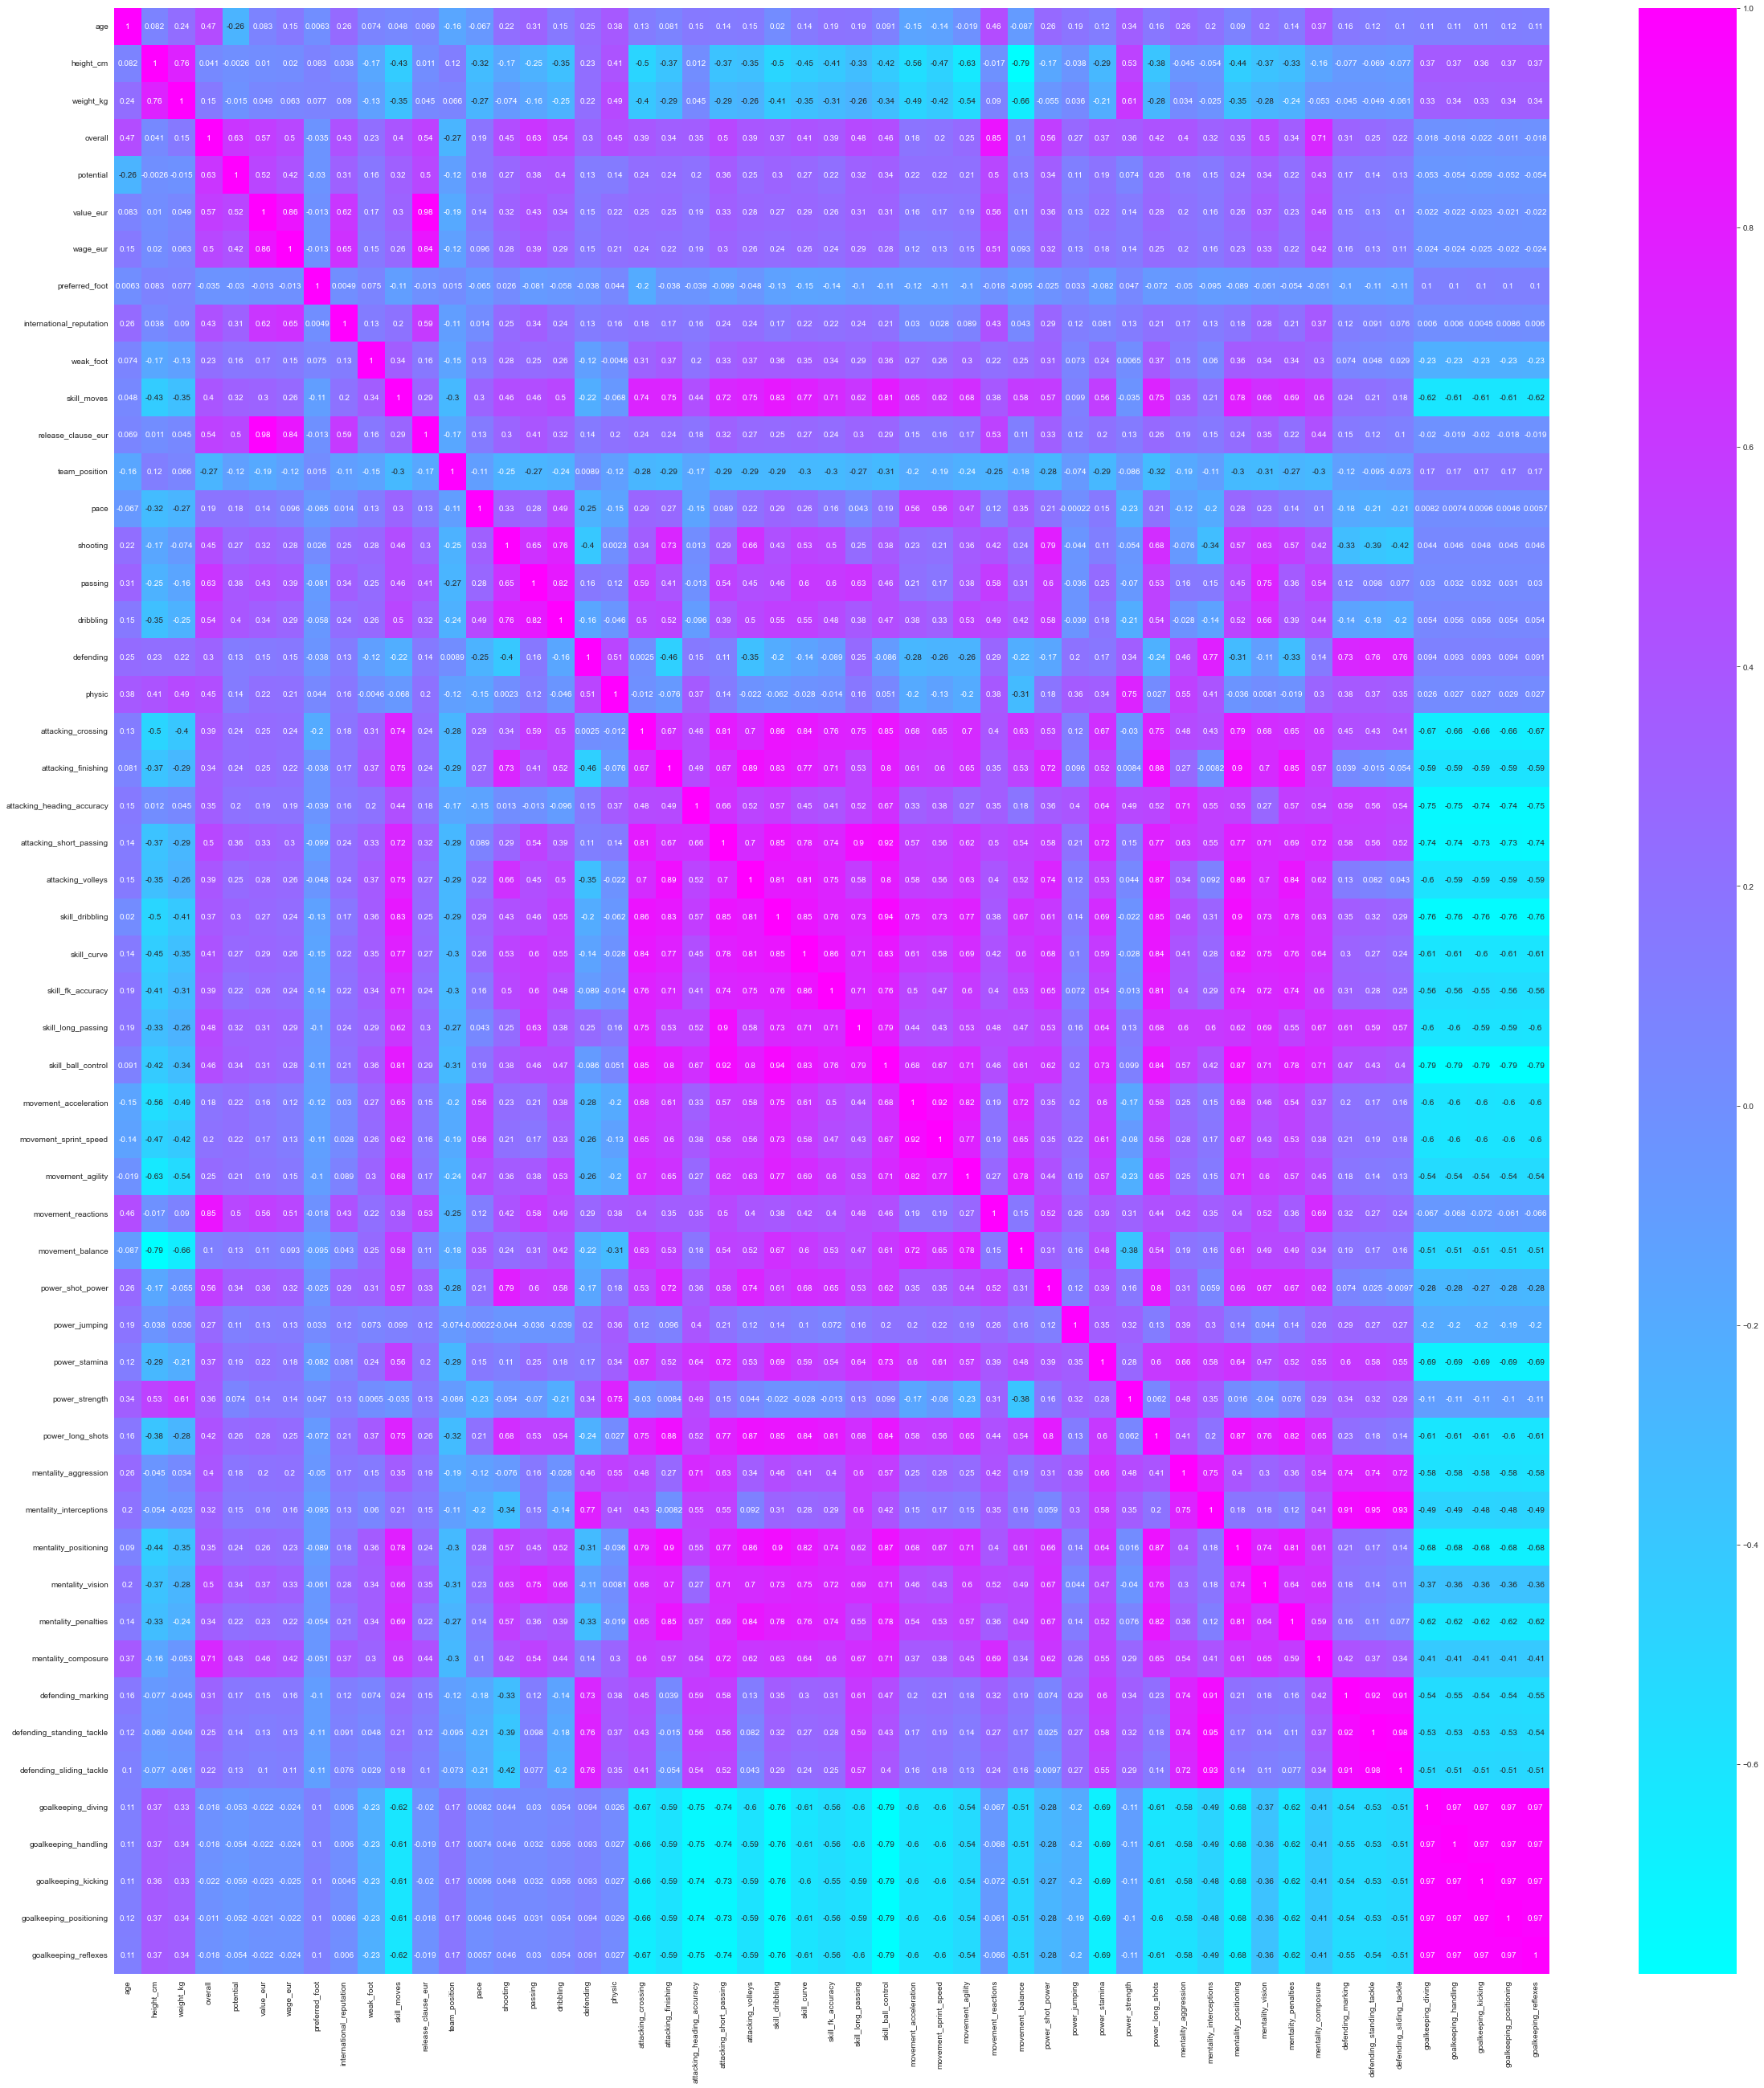

In [117]:
# Plot hitmap for better visualisation
plt.figure(figsize=(40,45))
sns.heatmap(data.corr(),annot=True,cmap='cool')
plt.show()

* From the above heatmap is very difficult to find highly correalted feature so we are create a python code to check the highly corelated feature

In [118]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1                   feature2      corr
0          release_clause_eur                  value_eur  0.979233
1                   value_eur         release_clause_eur  0.979233
2    defending_sliding_tackle  defending_standing_tackle  0.975808
3   defending_standing_tackle   defending_sliding_tackle  0.975808
4          goalkeeping_diving       goalkeeping_reflexes  0.973922
5        goalkeeping_reflexes         goalkeeping_diving  0.973922
6        goalkeeping_handling         goalkeeping_diving  0.971330
7          goalkeeping_diving       goalkeeping_handling  0.971330
8        goalkeeping_reflexes       goalkeeping_handling  0.971244
9        goalkeeping_handling       goalkeeping_reflexes  0.971244
10         goalkeeping_diving    goalkeeping_positioning  0.971218
11    goalkeeping_positioning         goalkeeping_diving  0.971218
12    goalkeeping_positioning       goalkeeping_reflexes  0.971060
13       goalkeeping_reflexes    goalkeeping_positioning  0.971060
14       goalkeeping_handling    goalkeeping_positioning  0.970517
15    goalkeeping_positioning       goalkeeping_handling  0.970517
16       goalkeeping_reflexes        goalkeeping_kicking  0.967866
17        goalkeeping_kicking       goalkeeping_reflexes  0.967866
18         goalkeeping_diving        goalkeeping_kicking  0.967057
19        goalkeeping_kicking         goalkeeping_diving  0.967057
20       goalkeeping_handling        goalkeeping_kicking  0.966508
21        goalkeeping_kicking       goalkeeping_handling  0.966508
22    goalkeeping_positioning        goalkeeping_kicking  0.966061
23        goalkeeping_kicking    goalkeeping_positioning  0.966061
24  defending_standing_tackle    mentality_interceptions  0.945287
25    mentality_interceptions  defending_standing_tackle  0.945287
26         skill_ball_control            skill_dribbling  0.943461
27            skill_dribbling         skill_ball_control  0.943461
28    mentality_interceptions   defending_sliding_tackle  0.933894
29   defending_sliding_tackle    mentality_interceptions  0.933894
30      movement_sprint_speed      movement_acceleration  0.923721
31      movement_acceleration      movement_sprint_speed  0.923721
32  defending_standing_tackle          defending_marking  0.918593
33          defending_marking  defending_standing_tackle  0.918593
34         skill_ball_control    attacking_short_passing  0.917721
35    attacking_short_passing         skill_ball_control  0.917721
36   defending_sliding_tackle          defending_marking  0.909153
37          defending_marking   defending_sliding_tackle  0.909153
38    mentality_interceptions          defending_marking  0.907401
39          defending_marking    mentality_interceptions  0.907401
40            skill_dribbling      mentality_positioning  0.904501
41      mentality_positioning            skill_dribbling  0.904501

##### DROP HIGHLY CORRELATED FEATURE

In [67]:
data.drop(['release_clause_eur','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing'],axis=1,inplace=True)

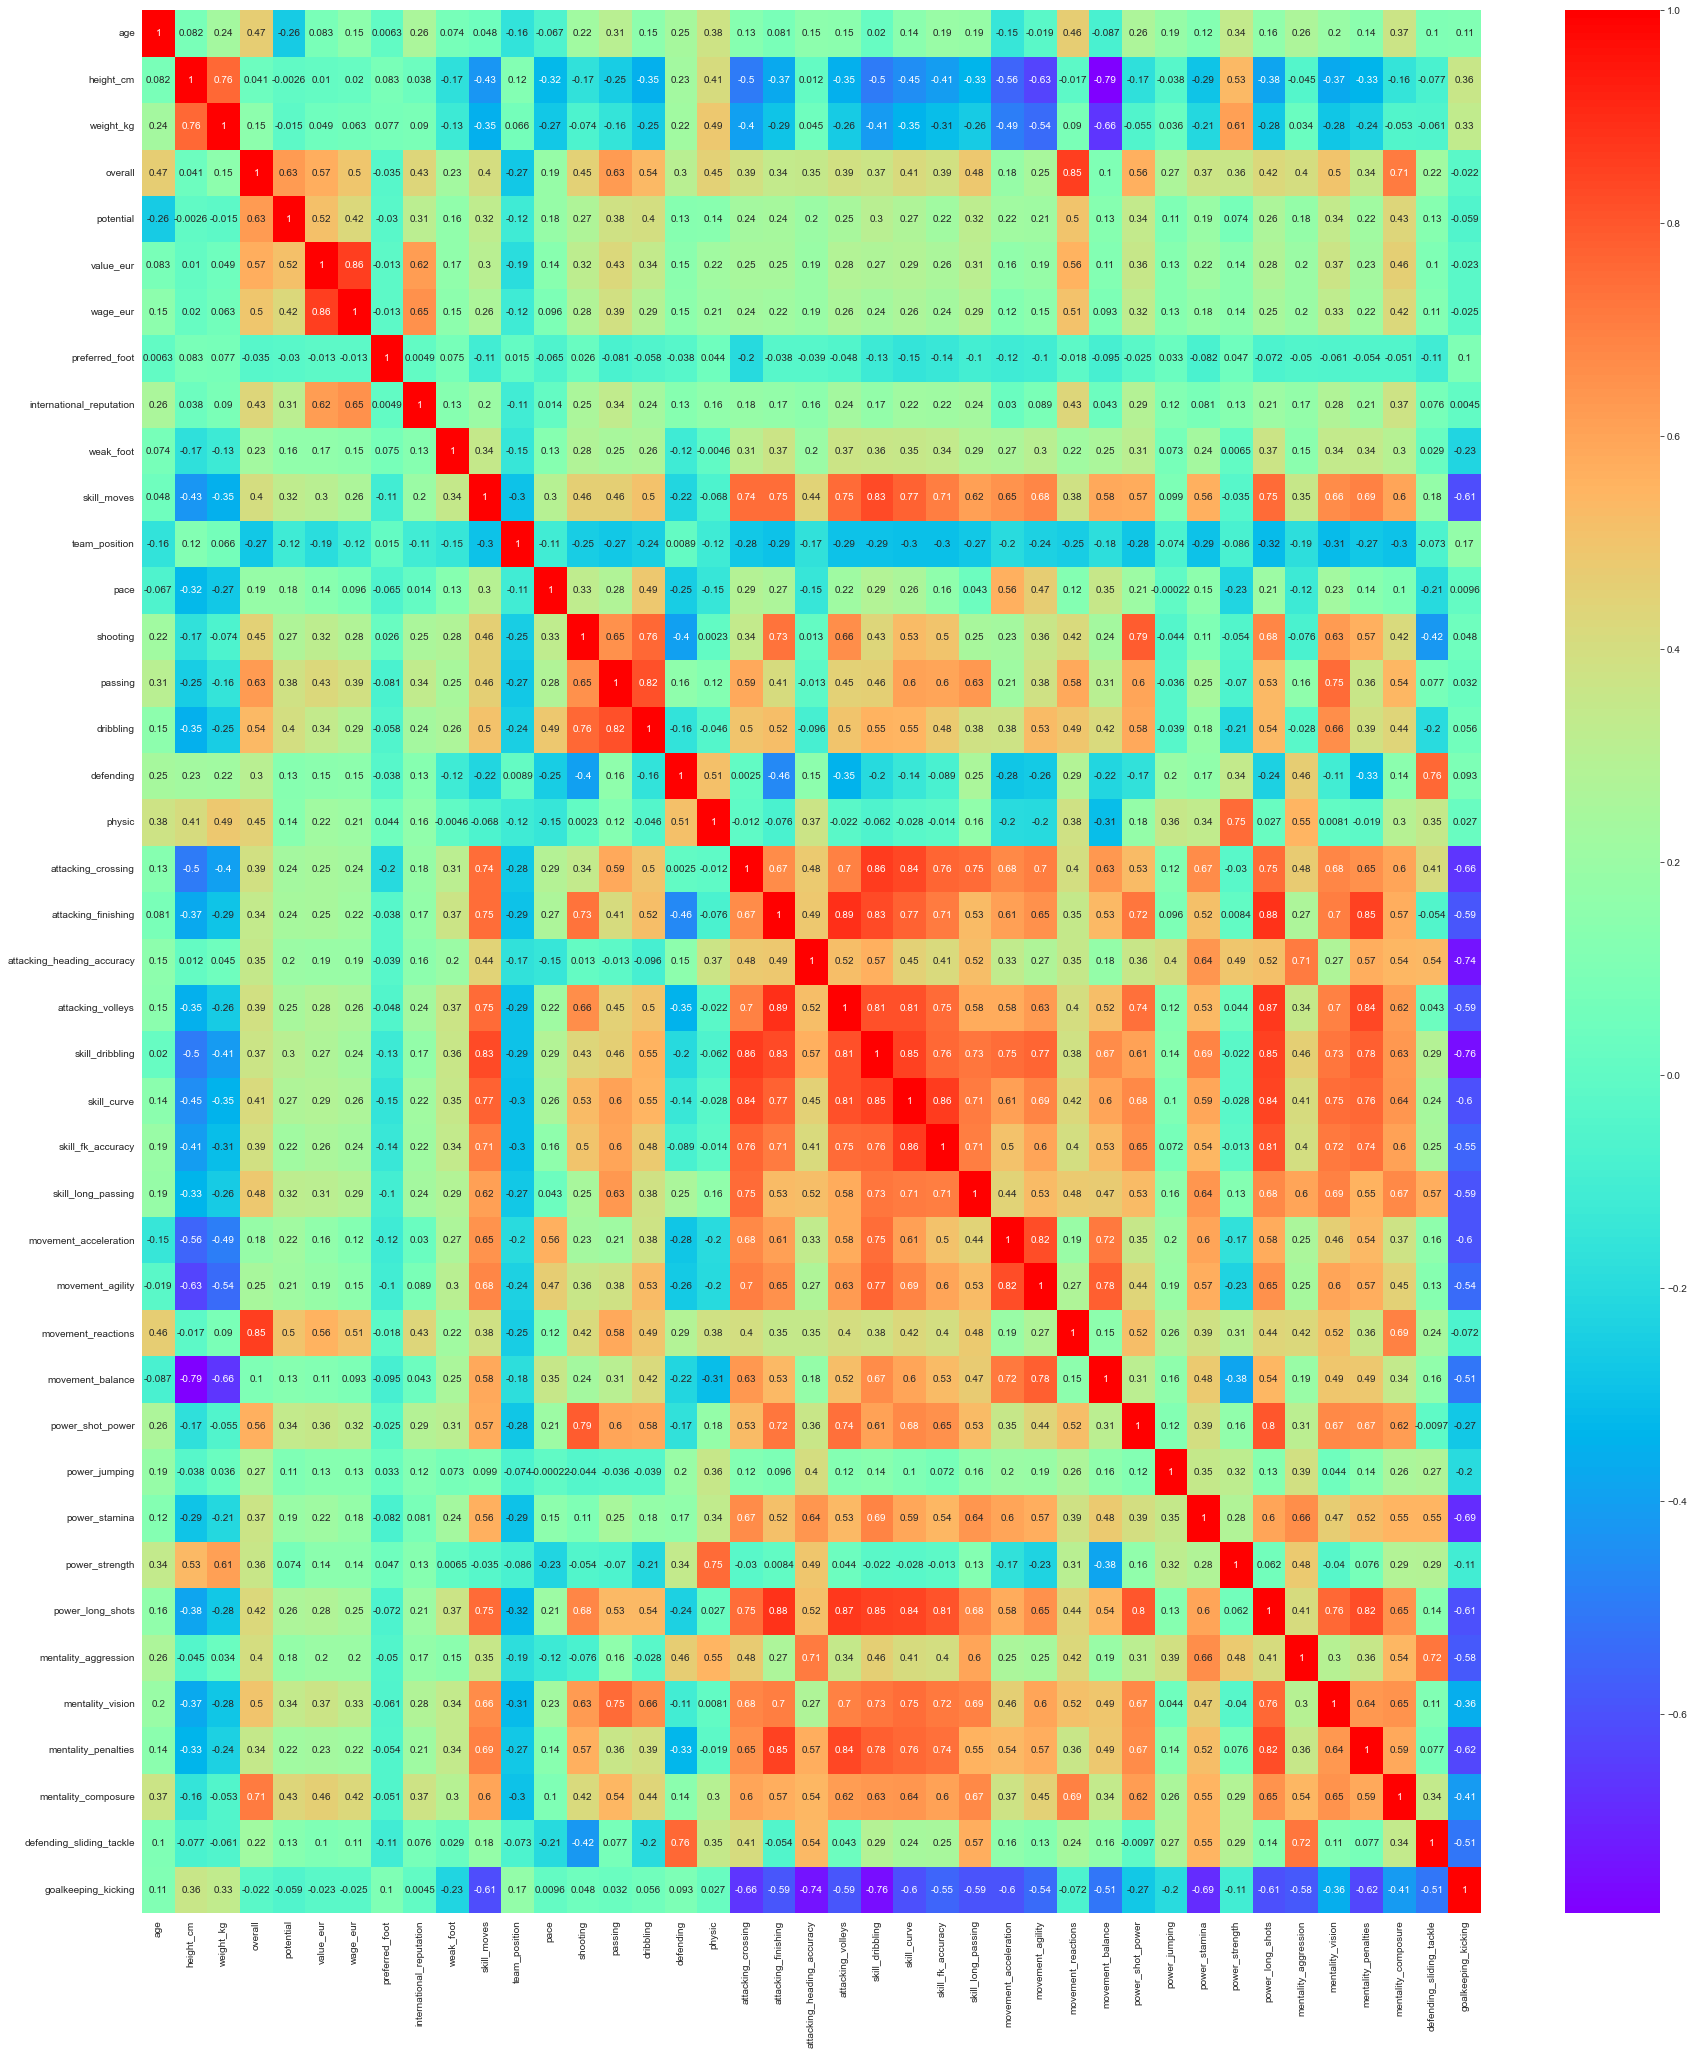

In [120]:
# Plot hitmap for after drop highly correlated feature better visualisation
plt.figure(figsize=(30,35))
sns.heatmap(data.corr(),annot=True,cmap='rainbow')
plt.show()

### 3.CHECKING DUPLICATES

In [69]:
data.duplicated().sum()

0

* Their is no duplicate present in data

### 4.PRINCIPLE COMPONENT ANALYSIS(PCA)

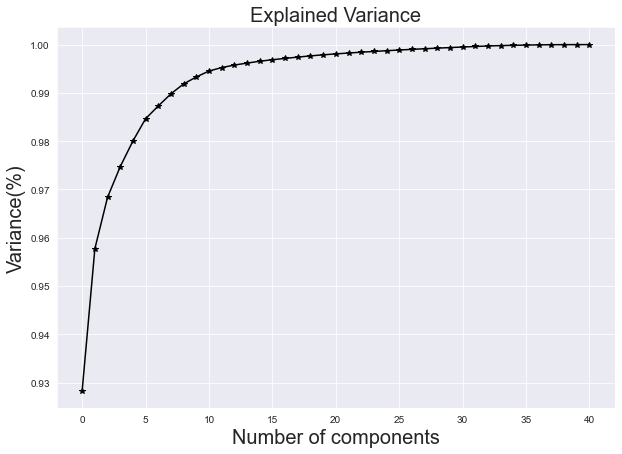

In [68]:
# Step:1 Getting optimal value of pca
from sklearn.decomposition import PCA
pca = PCA() # Object creation
principlecomponents = pca.fit_transform(data) # Fitting the data
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*',color='k') #plot the variance ratio
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()



* Here we are select 10 components because less varaince loss

In [69]:
# Step:2 Select the components
pca = PCA(n_components=10)
fifa = pca.fit_transform(data)

# Step:3 Make new dataframe
principle_df = pd.DataFrame(data=fifa,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.461256  2.015093 -0.120716  1.421171  0.341254  2.739365  1.537923   
1  14.498249  2.574933 -0.087257  1.623457  1.366016  2.168914  1.613297   
2   8.528416  3.407803 -0.926819  1.136359  1.184205  2.325616  1.935475   
3  -1.789442 -1.354069 -0.828835  0.997628  0.682168  1.649941  0.772429   
4  14.445248  1.825999 -0.363463  0.916801  1.017117  1.766322  1.135605   

       pca8      pca9     pca10  
0 -0.620562  1.302043 -0.046867  
1  0.292837  1.265563 -0.273975  
2 -0.107832  1.244938  0.241127  
3 -0.284515  0.193698 -0.255378  
4 -0.397061  1.032439  0.079784

### K-MEANS CLUSTERING

### MODEL CREATION
#### AIM 
* Create a cluster on data
* Get best sillhoutte score, range of sillhoutte score between -1 to +1

In [70]:
#Step:1 Define independant veriable
X = principle_df
X.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.461256  2.015093 -0.120716  1.421171  0.341254  2.739365  1.537923   
1  14.498249  2.574933 -0.087257  1.623457  1.366016  2.168914  1.613297   
2   8.528416  3.407803 -0.926819  1.136359  1.184205  2.325616  1.935475   
3  -1.789442 -1.354069 -0.828835  0.997628  0.682168  1.649941  0.772429   
4  14.445248  1.825999 -0.363463  0.916801  1.017117  1.766322  1.135605   

       pca8      pca9     pca10  
0 -0.620562  1.302043 -0.046867  
1  0.292837  1.265563 -0.273975  
2 -0.107832  1.244938  0.241127  
3 -0.284515  0.193698 -0.255378  
4 -0.397061  1.032439  0.079784

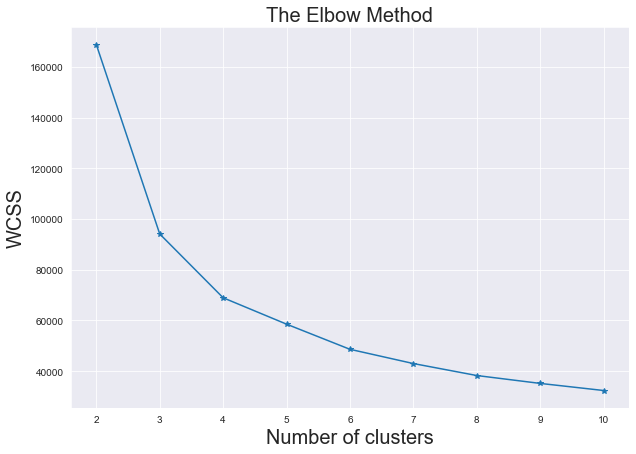

In [71]:
# Step:3 Initalize the k value
from sklearn.cluster import KMeans
kmeans = KMeans() # Object creation
wcss = [] # Create empty list

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(2,11),wcss,marker='*')
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.show()


* From above plot we are select 3 cluster because of odd no and more variance

In [72]:
# Step:3 initalize the cluster
kmeans = KMeans(n_clusters=3,random_state=45)

# Step:4 Fitting the data
kmeans.fit(X)

# Step:5  Get labels
kmeans.labels_

# Step:6 Print dataset with labels
principle_df['cluster'] = pd.DataFrame(kmeans.labels_)
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.461256  2.015093 -0.120716  1.421171  0.341254  2.739365  1.537923   
1  14.498249  2.574933 -0.087257  1.623457  1.366016  2.168914  1.613297   
2   8.528416  3.407803 -0.926819  1.136359  1.184205  2.325616  1.935475   
3  -1.789442 -1.354069 -0.828835  0.997628  0.682168  1.649941  0.772429   
4  14.445248  1.825999 -0.363463  0.916801  1.017117  1.766322  1.135605   

       pca8      pca9     pca10  cluster  
0 -0.620562  1.302043 -0.046867        2  
1  0.292837  1.265563 -0.273975        2  
2 -0.107832  1.244938  0.241127        1  
3 -0.284515  0.193698 -0.255378        0  
4 -0.397061  1.032439  0.079784        2

In [73]:
# Step:7 initalize the centroids
kmeans.cluster_centers_

array([[-3.03251217e+00, -6.90993259e-02, -1.11911340e-02,
         4.23097263e-04,  4.01315110e-03,  2.65527459e-03,
         6.82662313e-03,  1.22634726e-02,  8.38559151e-03,
         1.66308781e-03],
       [ 4.43843567e+00,  3.74492120e-01,  5.74574061e-02,
        -1.21603913e-03, -3.33722592e-02, -2.69006704e-04,
        -2.04306584e-02, -5.31863694e-02, -5.23260395e-02,
        -7.88882643e-03],
       [ 1.34760598e+01, -2.34704589e-01, -3.16812651e-02,
        -6.97400653e-04,  3.66660570e-02, -1.89688667e-02,
        -9.64709105e-03,  1.53404749e-02,  4.21169814e-02,
         3.42026079e-03]])

### MODEL EVALUATION

##### SILHOUETTE SCORE
* silhouette score range(-1 to +1)
* +1 ---> Samles are very far from cluster
*  0 ---> Samples close to dicision boundry
* -1 ---> Samples are assign to wrong cluster

In [74]:
# Step:8 Create a new veriable assign to labels
labels = kmeans.labels_
labels

# Step:9 import library to evaluate the model
from sklearn.metrics import silhouette_score
silhou_score = silhouette_score(X,labels)
print("Silhouette Score:",silhou_score)

Silhouette Score: 0.6162905019215587


### CONCLUSION:
* 3 Cluster silhouette score is 0.6162
* 5 cluster Silhouette Score is 0.5011
* From the above score of we are select the 3 cluster

##### CLUSTER

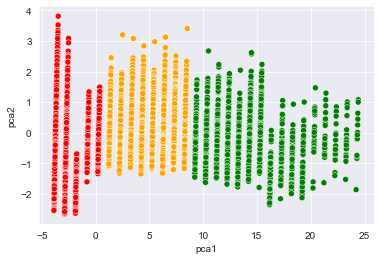

In [76]:
color = np.array(['red','orange','green'])
sns.scatterplot(principle_df.pca1,principle_df.pca2,c=color[kmeans.labels_])
plt.show()

### MODEL SAVING

In [78]:
# Model saving using pickle
import pickle
file = open("kmeans_clustering_model.pkl","wb")
pickle.dump(kmeans,file)